# Import libraries

In [238]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [239]:
import seaborn as sns        # Seaborn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
! pip install plotly
import plotly.graph_objects as go  # interactive charts
import plotly.express as px
import statistics as stats # calculate mode, mean and median

# Preprocessing

## df info

In [240]:
# loading dataset
df = pd.read_csv(r"/Users/k_k22/Downloads/Data Analysis/Tencent_course/第一周_员工薪水分析/salaries.csv",thousands=',', decimal='.')

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [242]:
df.head(3)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN


In [243]:
# Checking unusual values
df.describe(include='all')

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
count,148654.000000,148654,148654,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,148654,0.0
unique,NaN,110811,2159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,NaN,Kevin Lee,Transit Operator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,San Francisco,NaN
freq,NaN,13,7036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148654,NaN
mean,74327.500000,NaN,NaN,66325.448841,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN,NaN
std,42912.857795,NaN,NaN,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN,NaN
min,1.000000,NaN,NaN,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN,NaN
25%,37164.250000,NaN,NaN,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN,NaN
50%,74327.500000,NaN,NaN,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN,NaN
75%,111490.750000,NaN,NaN,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN,NaN


In [244]:
# Drop columns Id - no meaning, Notes/Status none
df_new = df.drop(columns = ['Id','Notes','Status'])

In [245]:
df_new.head(1)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,San Francisco


## null and duplicate values

In [246]:
# % of null values
# http://theprofessionalspoint.blogspot.com/2019/03/visualize-missing-values-in-bar-plot.html
null_values = df_new.isnull().sum() / len(df_new) *100
null_values = null_values[null_values > 0]
null_values.sort_values(inplace=True)
null_values

OvertimePay     0.002691
OtherPay        0.002691
BasePay         0.409676
Benefits       24.326961
dtype: float64

In [247]:
# duplicated value datafram
df_new.duplicated().sum()
df_new[df_new.duplicated()]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
148650,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco
148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco
148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco


In [248]:
# drop null and duplicates
#OvertimePay     0.002691
#OtherPay        0.002691
#BasePay         0.409676

df_clean = df_new.drop_duplicates()
df_clean = df_clean.dropna(subset=['OvertimePay', 'OtherPay','BasePay'])

In [249]:
# replace null value with 0
df_clean['Benefits'] = df['Benefits'].fillna(0.0)

In [250]:
# Year value - dtype, no need to treat as numerical data
df_clean['Year'] = df_clean['Year'].astype('category') # Dtype target variable 

# EDA

In [251]:
# Num features vs Cat features

cat_features = []
num_features = []

for i in df_clean:
    if df_clean[i].dtype == 'object' or df_clean[i].dtype.name == 'category':
        cat_features.append(i)
        
    elif df_clean[i].dtype == 'int64' or df_clean[i].dtype == 'float64':
        num_features.append(i)
               
print( 'cat_features = ', cat_features)
print('num_features = ', num_features)

cat_features =  ['EmployeeName', 'JobTitle', 'Year', 'Agency']
num_features =  ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']


## Analysis Trial
- <b>Categorical data</b>：
<ul>
<li>这是一份政府部门的员工薪水数据表，可能是警察局</li>
<li>职位以公职为主，列出了2154种不同职位，其中Transit Operator出现次数最多，达6975次</li>
<li>叫Kevein Lee的员工出现次数最多，达13次</li>
<li>共出现四个年份，其中2014年样本数最多</li>
<li>所有样本都来自San Francisco Agency，对样本其他变量影响不大，可以删除</li>
</ul>

- <b>Numerical data</b>：
<ul>
<li>BasePay的中位数为66325.45，Benefits的中位数为18980.33</li>
<li>OvertimePay和Otherpay的情况类似，中位数数值小</li>
</ul>


In [252]:
df_clean.Year.value_counts()

2014    38119
2013    37001
2012    36766
2011    36159
Name: Year, dtype: int64

In [253]:
df_clean.JobTitle.value_counts()

Transit Operator                        6975
Special Nurse                           4382
Registered Nurse                        3725
Public Svc Aide-Public Works            2514
Police Officer 3                        2411
                                        ... 
Pr DistAtty Invstgtor,SpecUnit             1
POWER HOUSE ELECTRICIAN SUPERVISOR I       1
Mobile Equipment Supervisor                1
Auto Body&Fender Wrk Asst Sprv             1
Chief Investment Officer                   1
Name: JobTitle, Length: 2154, dtype: int64

In [254]:
df_clean.describe(include='all')

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
count,148045,148045,148045.000000,148045.000000,148045.000000,148045.000000,148045.000000,148045.000000,148045.0,148045
unique,110313,2154,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1
top,Kevin Lee,Transit Operator,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,San Francisco
freq,13,6975,NaN,NaN,NaN,NaN,NaN,NaN,38119.0,148045
mean,NaN,NaN,66325.448841,5086.740800,3645.661408,18980.334019,75057.851048,94038.185067,NaN,NaN
std,NaN,NaN,42764.635495,11473.181557,8019.498636,17176.391332,50409.761170,62683.477905,NaN,NaN
min,NaN,NaN,-166.010000,-0.010000,-7058.590000,-13.800000,-618.130000,-618.130000,NaN,NaN
25%,NaN,NaN,33588.200000,0.000000,0.000000,0.000000,36958.160000,45077.410000,NaN,NaN
50%,NaN,NaN,65007.450000,0.000000,817.170000,23468.340000,71644.710000,92675.510000,NaN,NaN
75%,NaN,NaN,94691.050000,4695.710000,4242.900000,33507.310000,106028.000000,133085.410000,NaN,NaN


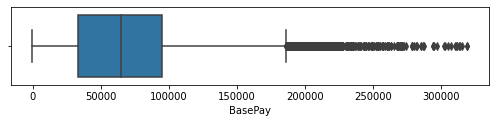

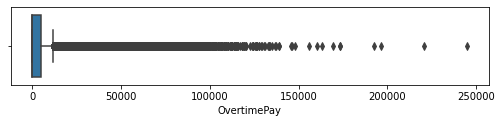

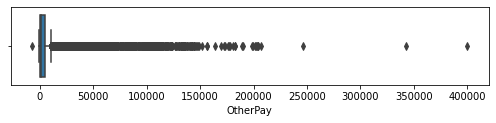

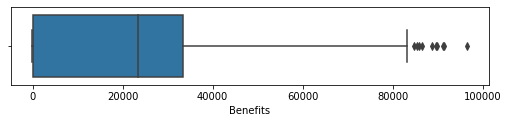

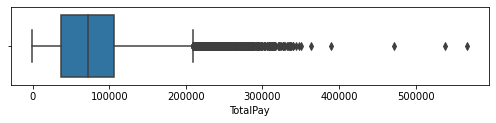

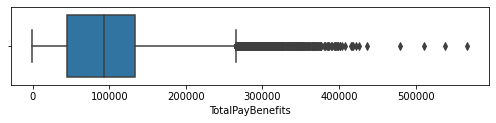

In [255]:
# Boxplot to analyse each num feature

for col in num_features:
  n =1
  _ = plt.figure(figsize=(60,10))
  _ = plt.subplot(6,6,n)
  _ = sns.boxplot(x = col, data=df_clean)
  n = n+1


- <b>Cross check: Num vs Cat</b>：
<ul>
<li>四年的总体工资数值TotalPay中位变化不大，工资增幅不大</li>
<li>2011年福利Benifits值几乎为0；样本中有非常高的加班费OvertimePay和其他支付OtherPay导致最终工资TotalPay & TotalPayBenifits出现outlier</li>
<li>从2012年开始,福利Benifits的出现使得工资和福利TotalPayBenifists的中位值达到100000</li>
</ul>


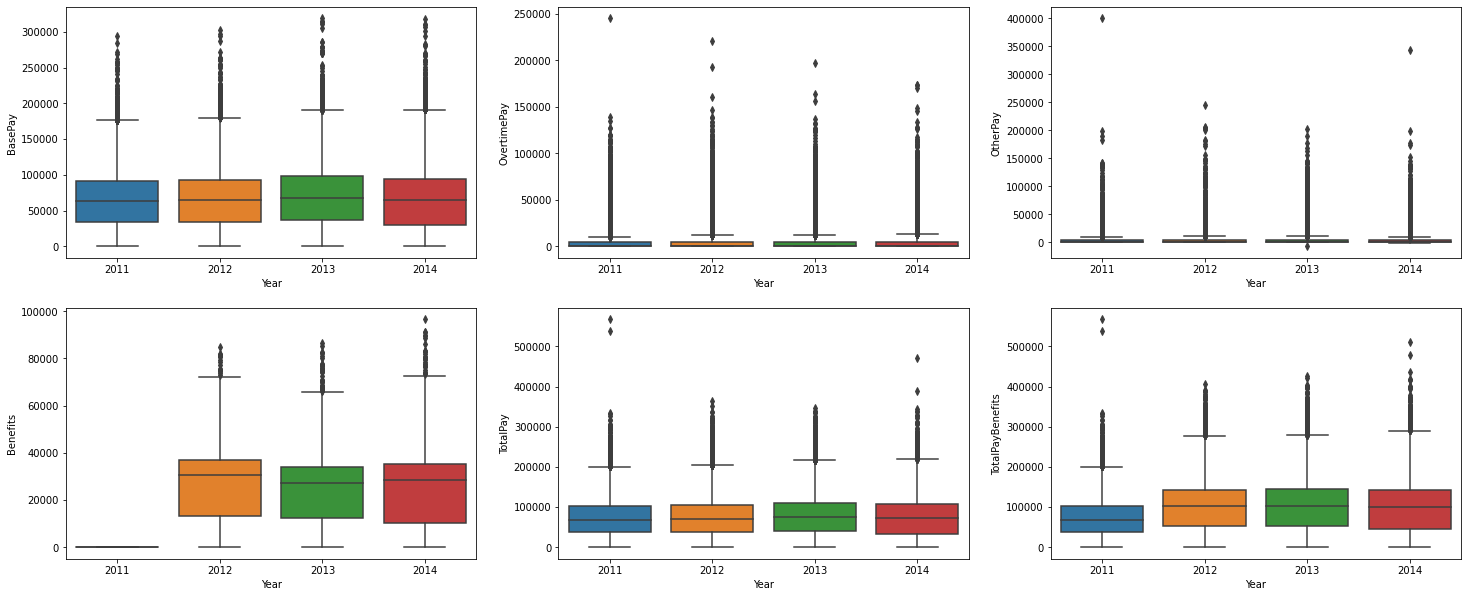

In [256]:
# Boxplot of numerical values  vs Year 
column_list = df_clean[num_features]
n=1 
_ = plt.figure(figsize=(25,60))
for col in column_list:
  var = 'Year'
  data = pd.concat([column_list[col], df_clean[var]], axis=1)
  _ = plt.subplot(11,3,n)
  _ = sns.boxplot(x=var, y =column_list[col], data=data )
  #_ = plt.title(col)
  n = n+1

- <b>工作时长对工资的影响</b>：
<ul>
<li>入职十年的工资和福利TotalPayBenefits居然最少</li>
<li>入职八年的基本工资BasePay最高</li>
<li>入职九年的福利Benifits最高</li>
</ul>

In [257]:
import datetime
now = datetime.datetime.now()

In [258]:
df_clean['WorkingYears'] = now.year - df_new['Year']
df_clean['WorkingYears'] = df_clean['WorkingYears'].astype('category')

In [259]:
df_clean['WorkingYears'].value_counts()

7     38119
8     37001
9     36766
10    36159
Name: WorkingYears, dtype: int64

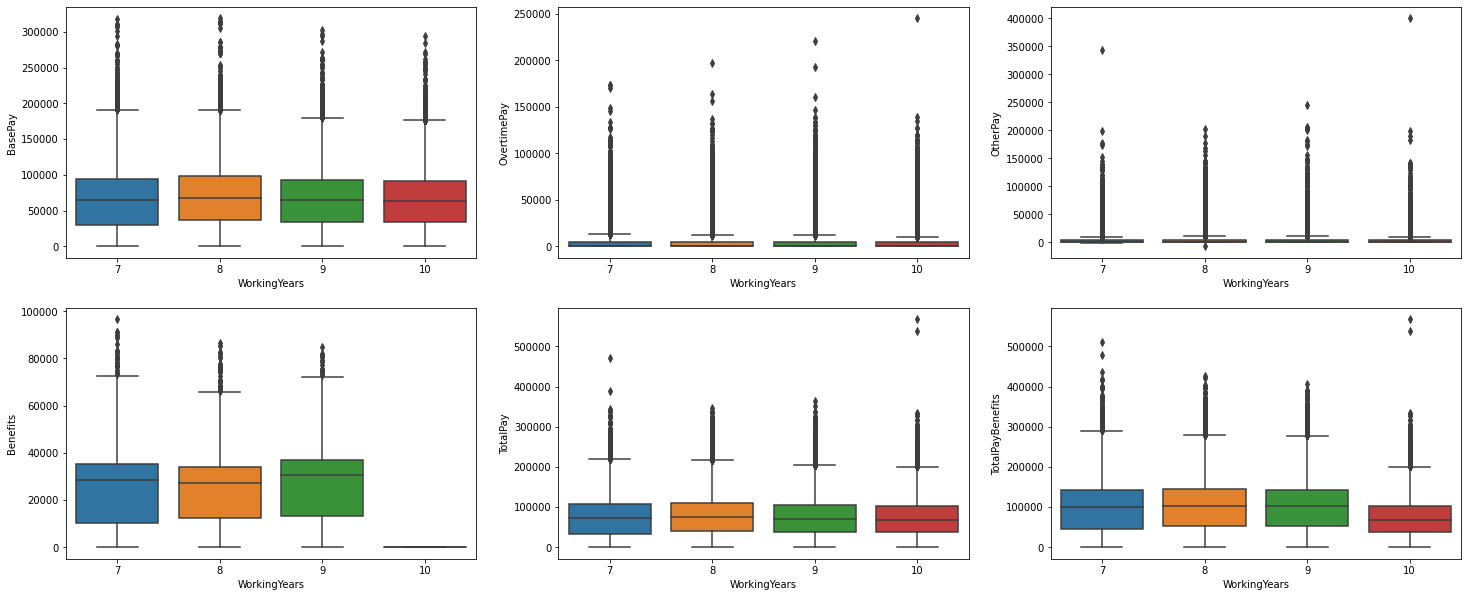

In [302]:
# Boxplot of numerical values  vs WorkingYear 
column_list = df_clean[num_features]
n=1 
_ = plt.figure(figsize=(25,60))
for col in column_list:
  var = 'WorkingYears'
  data = pd.concat([column_list[col], df_clean[var]], axis=1)
  _ = plt.subplot(11,3,n)
  _ = sns.boxplot(x=var, y =column_list[col], data=data )
  #_ = plt.title(col)
  n = n+1

- <b>奇怪的想法：性别的影响 → 从名字预测出性别</b>

<ul>
<li>除了福利Benifits,男性的各种收入都高于女性😠</li>
</ul>

In [261]:
# https://github.com/Bemmu/gender-from-name 
# https://web.archive.org/web/20120420112950/http://www.census.gov/genealogy/names/names_files.html

gender = { u'ÉDOUARD': 'male', u'FRANÇOIS': 'male', u'LIAM': 'male', u'ALEXEY': 'male', u'ILYA': 'male', u'MATTHIAS': 'male', u'TIAGO': 'male', u'STANISLAW': 'male', u'PIOTR': 'male', u'DOLPH': 'male', u'AMIR': 'male', u'CHRISTOPH': 'male', u'KELLEE': 'female', u'ELANE': 'female', u'IDALIA': 'female', u'ELANA': 'female', u'MELISSIA': 'female', u'DANELLE': 'female', u'RACHEAL': 'female', u'DOLORES': 'female', u'LATANYA': 'female', u'ERIN': 'female', u'JESS': 'male', u'DONOVAN': 'male', u'ERIK': 'male', u'BRITTANY': 'female', u'BESSIE': 'female', u'ESTER': 'female', u'VICKEY': 'female', u'NORIKO': 'female', u'TERENCE': 'male', u'KELLEY': 'female', u'ERIC': 'male', u'JOHNNA': 'female', u'KASIE': 'female', u'CHRISTIAN': 'male', u'JOHNNY': 'male', u'KARYN': 'female', u'HECTOR': 'male', u'LEOLA': 'female', u'OPAL': 'female', u'TINY': 'female', u'AMINA': 'female', u'ALFONSO': 'male', u'TINA': 'female', u'MARGART': 'female', u'HOLLEY': 'female', u'FELISHA': 'female', u'MARCY': 'female', u'HANK': 'male', u'EARL': 'male', u'ALMEDA': 'female', u'HANH': 'female', u'BRONWYN': 'female', u'HARRIETTE': 'female', u'WINNIE': 'female', u'HANA': 'female', u'PRUDENCE': 'female', u'PATSY': 'female', u'LEEANN': 'female', u'ENDA': 'female', u'CHRIS': 'male', u'GLADY': 'female', u'HANS': 'male', u'JULIANN': 'female', u'RANDOLPH': 'male', u'MARJORY': 'female', u'HAYLEY': 'female', u'KRYSTINA': 'female', u'CONCHA': 'female', u'HONG': 'female', u'MONET': 'female', u'EDEN': 'female', u'HOLLIE': 'female', u'MAY': 'female', u'MAX': 'male', u'JOEL': 'male', u'CORTNEY': 'female', u'NEAL': 'male', u'KEENAN': 'male', u'VERLENE': 'female', u'FRANCE': 'female', u'SAMATHA': 'female', u'HOLLIS': 'male', u'MAC': 'male', u'KYONG': 'female', u'MAE': 'female', u'MAI': 'female', u'REMA': 'female', u'BRANT': 'male', u'MARTHA': 'female', u'TRESSA': 'female', u'DOMENICA': 'female', u'SCARLETT': 'female', u'JOEY': 'male', u'ROSINA': 'female', u'FAITH': 'female', u'HAROLD': 'male', u'JAYME': 'female', u'BEN': 'male', u'NORMAN': 'male', u'EMORY': 'male', u'EVA': 'female', u'BEA': 'female', u'FLORANCE': 'female', u'EVE': 'female', u'BEE': 'female', u'GIANNA': 'female', u'MERIDETH': 'female', u'VENA': 'female', u'ALEJANDRINA': 'female', u'MIREILLE': 'female', u'WILBERT': 'male', u'BEV': 'female', u'KACIE': 'female', u'BARNEY': 'male', u'ROSALIE': 'female', u'NIKOLE': 'female', u'ANTONE': 'male', u'RICHARD': 'male', u'TESSIE': 'female', u'HORTENSIA': 'female', u'LATISHA': 'female', u'JEANENE': 'female', u'THERESIA': 'female', u'CHRISTOPER': 'male', u'LAKISHA': 'female', u'KEIRA': 'female', u'GWENN': 'female', u'LINETTE': 'female', u'TIFFANIE': 'female', u'ANTONY': 'male', u'DOVIE': 'female', u'CLEMENT': 'male', u'SHENITA': 'female', u'GLADIS': 'female', u'MALLIE': 'female', u'JACKSON': 'male', u'THORA': 'female', u'GLORY': 'female', u'TONI': 'female', u'BETTE': 'female', u'KALYN': 'female', u'MARION': 'female', u'KATINA': 'female', u'EDGAR': 'male', u'PIERRE': 'male', u'PATIENCE': 'female', u'LAVINIA': 'female', u'MAZIE': 'female', u'BETTY': 'female', u'VESTA': 'female', u'GARY': 'male', u'TONY': 'male', u'GENIE': 'female', u'REGAN': 'female', u'WILMA': 'female', u'BASILIA': 'female', u'GENIA': 'female', u'WARREN': 'male', u'FLORENTINA': 'female', u'SHAUN': 'male', u'MERLIN': 'male', u'LEIGHANN': 'female', u'FREDA': 'female', u'MERRI': 'female', u'DELINDA': 'female', u'ALBERTINA': 'female', u'MOHAMMED': 'male', u'ALBERTINE': 'female', u'AZZIE': 'female', u'SHERWOOD': 'male', u'DYAN': 'female', u'AIMEE': 'female', u'DWANA': 'female', u'MERRY': 'female', u'VANDA': 'female', u'KATHARINE': 'female', u'CLELIA': 'female', u'SUELLEN': 'female', u'KATHARINA': 'female', u'CARMON': 'female', u'RITA': 'female', u'JACK': 'male', u'SIMONA': 'female', u'ARCHIE': 'male', u'JAMIE': 'female', u'OZIE': 'female', u'CARLEY': 'female', u'DWAIN': 'male', u'DARCY': 'female', u'SAMUEL': 'male', u'DELPHIA': 'female', u'LEON': 'male', u'WINONA': 'female', u'DARLINE': 'female', u'SHAWNNA': 'female', u'MARIETTA': 'female', u'GWENDOLYN': 'female', u'RHODA': 'female', u'OTELIA': 'female', u'ELOUISE': 'female', u'BEVERLY': 'female', u'HARRIET': 'female', u'JERRELL': 'male', u'ELENORA': 'female', u'LANELLE': 'female', u'WILDA': 'female', u'MARLEEN': 'female', u'DIXIE': 'female', u'ELIZBETH': 'female', u'TERRI': 'female', u'SAMUAL': 'male', u'NOVELLA': 'female', u'MERRIE': 'female', u'NOLA': 'female', u'MONIQUE': 'female', u'SHARLENE': 'female', u'TERRA': 'female', u'VINCENZA': 'female', u'OUIDA': 'female', u'MELANIE': 'female', u'RICHIE': 'male', u'MELANIA': 'female', u'TERRY': 'male', u'CASIE': 'female', u'INGEBORG': 'female', u'CLAUD': 'male', u'ELLSWORTH': 'male', u'VINCENZO': 'male', u'KARYL': 'female', u'DONYA': 'female', u'BRITNI': 'female', u'CYNDI': 'female', u'NANNETTE': 'female', u'LOUIS': 'male', u'GILMA': 'female', u'EMERY': 'male', u'LISABETH': 'female', u'DELORIS': 'female', u'JASPER': 'male', u'VIOLA': 'female', u'NAKISHA': 'female', u'HEDY': 'female', u'TAMATHA': 'female', u'ALESHA': 'female', u'DEBORAH': 'female', u'LOUIE': 'male', u'SHERIDAN': 'female', u'EDA': 'female', u'JARRETT': 'male', u'MITSUE': 'female', u'SADIE': 'female', u'EARLE': 'male', u'SABRINA': 'female', u'ALVA': 'male', u'BRITANY': 'female', u'IVEY': 'female', u'LEAH': 'female', u'MICHEL': 'male', u'ORA': 'female', u'RENATO': 'male', u'LAKESHIA': 'female', u'DONTE': 'male', u'JANIS': 'female', u'KIMBRA': 'female', u'MARVIN': 'male', u'OWEN': 'male', u'IRWIN': 'male', u'FERN': 'female', u'JANIE': 'female', u'MIMI': 'female', u'TRESSIE': 'female', u'CARMELLA': 'female', u'JENA': 'female', u'GILBERTE': 'female', u'JENE': 'female', u'ROSEANN': 'female', u'JOSUE': 'male', u'DESIRE': 'female', u'IRIS': 'female', u'SANTOS': 'male', u'LE': 'female', u'MAYME': 'female', u'MAURICE': 'male', u'MAIRE': 'female', u'ONA': 'female', u'CANDACE': 'female', u'MAIRA': 'female', u'SASHA': 'female', u'EMMA': 'female', u'CAROLINE': 'female', u'KRISTIN': 'female', u'ANITA': 'female', u'KRISTIE': 'female', u'STANLEY': 'male', u'ISAURA': 'female', u'REINA': 'female', u'SHARDA': 'female', u'KARAN': 'female', u'MARIBEL': 'female', u'NEVILLE': 'male', u'DOMINQUE': 'female', u'LILLIAN': 'female', u'DENEEN': 'female', u'LILLIAM': 'female', u'OPHELIA': 'female', u'TAWANDA': 'female', u'THADDEUS': 'male', u'NEREIDA': 'female', u'DORENE': 'female', u'VELMA': 'female', u'WONDA': 'female', u'KENNITH': 'male', u'CARYL': 'female', u'GERTHA': 'female', u'CARYN': 'female', u'RASHIDA': 'female', u'REMONA': 'female', u'AKIKO': 'female', u'JEFFEREY': 'male', u'TERI': 'female', u'MARGOT': 'female', u'ALAINA': 'female', u'DEMETRIUS': 'male', u'CORALIE': 'female', u'TARAH': 'female', u'JANN': 'female', u'JANI': 'female', u'VELDA': 'female', u'JANE': 'female', u'SORAYA': 'female', u'GISELA': 'female', u'RUTH': 'female', u'JANA': 'female', u'MARYLIN': 'female', u'JACKELYN': 'female', u'MISTY': 'female', u'ESMERALDA': 'female', u'LORAINE': 'female', u'ELKE': 'female', u'JONNIE': 'female', u'VERNETTA': 'female', u'PANSY': 'female', u'JOANNE': 'female', u'FELICITAS': 'female', u'AMPARO': 'female', u'ELLEN': 'female', u'CHELSEY': 'female', u'FREDRICK': 'male', u'CINDA': 'female', u'CARLEEN': 'female', u'REMEDIOS': 'female', u'RAVEN': 'female', u'AMBER': 'female', u'FREDDY': 'male', u'HAYWOOD': 'male', u'EBONIE': 'female', u'EZEQUIEL': 'male', u'SAM': 'male', u'SAL': 'male', u'GEORGINA': 'female', u'JOY': 'female', u'LAKIA': 'female', u'HALEY': 'female', u'MARISOL': 'female', u'ARMANDINA': 'female', u'SCARLET': 'female', u'LUCILA': 'female', u'DANIEL': 'male', u'JOE': 'male', u'LUCILE': 'female', u'MARTIN': 'male', u'JODY': 'female', u'JOI': 'female', u'JESSIKA': 'female', u'SAU': 'female', u'MARISA': 'female', u'SUSANA': 'female', u'HWA': 'female', u'IDELL': 'female', u'SHELDON': 'male', u'JAY': 'male', u'CHI': 'male', u'SHONA': 'female', u'DEMETRICE': 'female', u'ALICE': 'female', u'SUSANN': 'female', u'ARNETTA': 'female', u'JAN': 'female', u'NEVA': 'female', u'YURI': 'female', u'AURELIA': 'female', u'VALENCIA': 'female', u'AURELIO': 'male', u'JAE': 'male', u'QUINTIN': 'male', u'REYNALDA': 'female', u'SHONDRA': 'female', u'SONIA': 'female', u'ESTELL': 'female', u'MARGIT': 'female', u'DORINE': 'female', u'CORLISS': 'female', u'PETRONILA': 'female', u'DACIA': 'female', u'REYNALDO': 'male', u'KIARA': 'female', u'BRITT': 'male', u'ZOLA': 'female', u'JANIECE': 'female', u'MARGIE': 'female', u'DEENA': 'female', u'CLOTILDE': 'female', u'KYM': 'female', u'MICKI': 'female', u'CLAIR': 'male', u'CAROLIN': 'female', u'GENNY': 'female', u'CORIE': 'female', u'FREDERICKA': 'female', u'RODGER': 'male', u'GALEN': 'male', u'VERONA': 'female', u'TERESE': 'female', u'KELVIN': 'male', u'HULDA': 'female', u'TERESA': 'female', u'EDMOND': 'male', u'BETSY': 'female', u'AFTON': 'female', u'DONALD': 'male', u'JONIE': 'female', u'ANGELITA': 'female', u'SANDRA': 'female', u'CATHY': 'female', u'EUGENIA': 'female', u'EUGENIE': 'female', u'TIJUANA': 'female', u'SHARI': 'female', u'VALARIE': 'female', u'VERNICE': 'female', u'SHARA': 'female', u'CARMINA': 'female', u'SELMA': 'female', u'SHERY': 'female', u'REBECKA': 'female', u'ANDREE': 'female', u'ALEJANDRO': 'male', u'KELSIE': 'female', u'SHERA': 'female', u'GUILLERMO': 'male', u'CATHERN': 'female', u'CORRINA': 'female', u'SHERI': 'female', u'TEMPLE': 'female', u'ALEJANDRA': 'female', u'DRUCILLA': 'female', u'VALERIA': 'female', u'CHERELLE': 'female', u'ALTHEA': 'female', u'JERI': 'female', u'VALERIE': 'female', u'SHERYLL': 'female', u'JERE': 'male', u'NIEVES': 'female', u'CHARIS': 'female', u'JAZMIN': 'female', u'LIEN': 'female', u'TWANDA': 'female', u'LOIS': 'female', u'BERNADETTE': 'female', u'AYAKO': 'female', u'TANYA': 'female', u'CELINE': 'female', u'WELDON': 'male', u'KELLIE': 'female', u'NATHANIEL': 'male', u'ANITRA': 'female', u'CAROLYNN': 'female', u'MEDA': 'female', u'SYREETA': 'female', u'LORETA': 'female', u'CAROLYNE': 'female', u'LATARSHA': 'female', u'BRITTNY': 'female', u'HIRAM': 'male', u'DARYL': 'male', u'ANTHONY': 'male', u'LARA': 'female', u'KATHERINE': 'female', u'MAO': 'female', u'LONNA': 'female', u'FELECIA': 'female', u'KENYA': 'female', u'LACRESHA': 'female', u'MAN': 'male', u'KAREEN': 'female', u'BRITTNI': 'female', u'DELISA': 'female', u'KAREEM': 'male', u'ASIA': 'female', u'DELAINE': 'female', u'ADELLE': 'female', u'BRADLY': 'male', u'JULE': 'female', u'TILLIE': 'female', u'CHARA': 'female', u'JULI': 'female', u'AIDA': 'female', u'JUSTA': 'female', u'AIDE': 'female', u'MIRTA': 'female', u'MARQUETTA': 'female', u'YURIKO': 'female', u'ALBERTO': 'male', u'BERENICE': 'female', u'ALBERTA': 'female', u'GRISELDA': 'female', u'SIDNEY': 'male', u'MAMIE': 'female', u'RETTA': 'female', u'WILFREDO': 'male', u'GITA': 'female', u'PAULETTE': 'female', u'LANE': 'male', u'FANNIE': 'female', u'PAULETTA': 'female', u'JUSTIN': 'male', u'LANA': 'female', u'NOREEN': 'female', u'CORDELIA': 'female', u'LANI': 'female', u'NATACHA': 'female', u'DANIELLA': 'female', u'EARNEST': 'male', u'MERLENE': 'female', u'DANIELLE': 'female', u'EMOGENE': 'female', u'SHAUNNA': 'female', u'FIONA': 'female', u'ELISE': 'female', u'MARCELINE': 'female', u'ELISA': 'female', u'MARCELINA': 'female', u'RUFINA': 'female', u'DORETTA': 'female', u'PATRICA': 'female', u'SHIN': 'female', u'LAKITA': 'female', u'JAYNE': 'female', u'PATRICE': 'female', u'MEGHAN': 'female', u'PATRICK': 'male', u'LILIANA': 'female', u'MISHA': 'female', u'MARCEL': 'male', u'RAQUEL': 'female', u'IONA': 'female', u'TIERRA': 'female', u'SHARRON': 'female', u'IONE': 'female', u'JEREMY': 'male', u'CHANG': 'male', u'BETH': 'female', u'CHANA': 'female', u'MELLIE': 'female', u'RAYMOND': 'male', u'YOLANDO': 'female', u'KANDI': 'female', u'LORA': 'female', u'KYRA': 'female', u'IRINA': 'female', u'YOLANDA': 'female', u'HISAKO': 'female', u'AYANNA': 'female', u'HALLEY': 'female', u'KANDY': 'female', u'HERMINIA': 'female', u'KATIE': 'female', u'AUSTIN': 'male', u'JOSPHINE': 'female', u'CASSANDRA': 'female', u'JEANETTE': 'female', u'IMA': 'female', u'PERRY': 'male', u'JEANETTA': 'female', u'AUGUST': 'male', u'MARNI': 'female', u'KAITLYN': 'female', u'BETTINA': 'female', u'CLEOPATRA': 'female', u'MARNA': 'female', u'VERLA': 'female', u'ANNIKA': 'female', u'VELLA': 'female', u'ELIJAH': 'male', u'JENAE': 'female', u'WILBER': 'male', u'SELINA': 'female', u'ELVA': 'female', u'JACLYN': 'female', u'CAITLIN': 'female', u'AYESHA': 'female', u'GERTIE': 'female', u'ETSUKO': 'female', u'LIZA': 'female', u'KASSIE': 'female', u'DOMENIC': 'male', u'CLAUDE': 'male', u'GAYLE': 'female', u'MITTIE': 'female', u'GAYLA': 'female', u'NICOLLE': 'female', u'CAMI': 'female', u'LAINE': 'female', u'POK': 'female', u'MAUREEN': 'female', u'ROBERTO': 'male', u'LENA': 'female', u'NIKKI': 'female', u'RACHAL': 'female', u'TOBIE': 'female', u'SEBRINA': 'female', u'PHILLIS': 'female', u'DARBY': 'female', u'SHERLYN': 'female', u'SEAN': 'male', u'JORDAN': 'male', u'GINGER': 'female', u'KASANDRA': 'female', u'REGGIE': 'male', u'JEANIE': 'female', u'MOSHE': 'male', u'ARDELLA': 'female', u'EARNESTINE': 'female', u'DELORA': 'female', u'HORACIO': 'male', u'CASSEY': 'female', u'LEONOR': 'female', u'STACIA': 'female', u'NECOLE': 'female', u'DICK': 'male', u'STACIE': 'female', u'CARLYN': 'female', u'NICK': 'male', u'LUELLA': 'female', u'SALLIE': 'female', u'ELDORA': 'female', u'DENAE': 'female', u'KIRA': 'female', u'RUTHE': 'female', u'JERILYN': 'female', u'SHANTELLE': 'female', u'KATY': 'female', u'SHERILYN': 'female', u'SHANDA': 'female', u'PAT': 'female', u'CLARISA': 'female', u'ANIKA': 'female', u'CANDI': 'female', u'LASANDRA': 'female', u'PAZ': 'female', u'SHANDI': 'female', u'BUFORD': 'male', u'PALMIRA': 'female', u'CRAIG': 'male', u'KATI': 'female', u'EVIA': 'female', u'OLINDA': 'female', u'LASHAUN': 'female', u'HETTIE': 'female', u'JANEEN': 'female', u'KATE': 'female', u'CLORINDA': 'female', u'ANTOINETTE': 'female', u'EDISON': 'male', u'SAUNDRA': 'female', u'CAROLEE': 'female', u'FRANCIE': 'female', u'SONJA': 'female', u'MADDIE': 'female', u'AGATHA': 'female', u'DEBBIE': 'female', u'MARILU': 'female', u'PABLO': 'male', u'DOMINICK': 'male', u'ERNESTINE': 'female', u'FRANCIS': 'male', u'LOUETTA': 'female', u'ERNESTINA': 'female', u'ANNAMARIA': 'female', u'TRICIA': 'female', u'MICHAL': 'male', u'SHEREE': 'female', u'BRIDGETTE': 'female', u'WEI': 'female', u'DINAH': 'female', u'MINTA': 'female', u'WEN': 'female', u'OZELL': 'female', u'NAIDA': 'female', u'ELEONORE': 'female', u'TIFFINY': 'female', u'YUONNE': 'female', u'ELEONORA': 'female', u'CALISTA': 'female', u'LATASHIA': 'female', u'SELENE': 'female', u'LUKE': 'male', u'BRANDON': 'male', u'FLORENCE': 'female', u'NAPOLEON': 'male', u'LATOSHA': 'female', u'FLORRIE': 'female', u'ANGIE': 'female', u'KIYOKO': 'female', u'ALMA': 'female', u'VALERI': 'female', u'MARYROSE': 'female', u'SHERYL': 'female', u'MATTIE': 'female', u'SHAREN': 'female', u'ADELE': 'female', u'GARNETT': 'female', u'DORETHEA': 'female', u'LAURINE': 'female', u'SHAREE': 'female', u'SHIRLEY': 'female', u'BABETTE': 'female', u'VALERY': 'female', u'ADELL': 'female', u'ZACHARIAH': 'male', u'ALEXANDER': 'male', u'VONNIE': 'female', u'ROSELLA': 'female', u'KALEIGH': 'female', u'LATASHA': 'female', u'RUBEN': 'male', u'RAYFORD': 'male', u'AMAL': 'female', u'BREANA': 'female', u'LIDA': 'female', u'NICHOL': 'female', u'BERTA': 'female', u'FRANCHESCA': 'female', u'GLADYS': 'female', u'BERTIE': 'female', u'ARDIS': 'female', u'SHALA': 'female', u'SUZIE': 'female', u'MICKIE': 'female', u'BABARA': 'female', u'KARMEN': 'female', u'CARMAN': 'female', u'CATHIE': 'female', u'WILLOW': 'female', u'NAKESHA': 'female', u'ROCHELLE': 'female', u'DANAE': 'female', u'KYOKO': 'female', u'PARIS': 'male', u'DORATHY': 'female', u'VIRGIL': 'male', u'TRINITY': 'female', u'FELICIDAD': 'female', u'BRIANA': 'female', u'KATRICE': 'female', u'LORENA': 'female', u'BUD': 'male', u'JOYE': 'female', u'MATHILDE': 'female', u'DELANA': 'female', u'MAXINE': 'female', u'LETHA': 'female', u'SIBYL': 'female', u'GENEVA': 'female', u'DAVINA': 'female', u'HARRIETT': 'female', u'FARAH': 'female', u'FRANSISCA': 'female', u'LAURYN': 'female', u'ESTRELLA': 'female', u'NICHOLE': 'female', u'DARCIE': 'female', u'KARIN': 'female', u'LATONIA': 'female', u'NATHAN': 'male', u'ALESSANDRA': 'female', u'KARIE': 'female', u'YONG': 'female', u'VICTOR': 'male', u'CHARLOTTE': 'female', u'ALINA': 'female', u'CLEMENTE': 'male', u'CLEORA': 'female', u'REGINE': 'female', u'ALINE': 'female', u'BRUCE': 'male', u'DELENA': 'female', u'MCKENZIE': 'female', u'FRITZ': 'male', u'ADELAIDA': 'female', u'KURT': 'male', u'ALONA': 'female', u'LARISSA': 'female', u'ALVERA': 'female', u'LAVERN': 'male', u'JOVAN': 'female', u'ILANA': 'female', u'ARIELLE': 'female', u'RIVA': 'female', u'SHARICE': 'female', u'ARIEL': 'female', u'GARNET': 'female', u'PRISCILA': 'female', u'SAMARA': 'female', u'GARFIELD': 'male', u'PATRIA': 'female', u'MURIEL': 'female', u'REGENIA': 'female', u'TYRELL': 'male', u'CLARINDA': 'female', u'NICOLASA': 'female', u'REINALDO': 'male', u'ANJELICA': 'female', u'TORA': 'female', u'JACINDA': 'female', u'CHUNG': 'male', u'EDGARDO': 'male', u'CAYLA': 'female', u'ILENE': 'female', u'SHERRELL': 'female', u'CHIQUITA': 'female', u'NAOMA': 'female', u'GREG': 'male', u'FREDRIC': 'male', u'LORENE': 'female', u'JADWIGA': 'female', u'NAOMI': 'female', u'SANTINA': 'female', u'TORY': 'male', u'KAM': 'female', u'CHERRIE': 'female', u'EWA': 'female', u'VERDELL': 'female', u'DARRIN': 'male', u'ORALEE': 'female', u'MARGUERITE': 'female', u'AUBREY': 'male', u'TRENTON': 'male', u'CORRINNE': 'female', u'TAMIE': 'female', u'KATHALEEN': 'female', u'DELPHA': 'female', u'GALE': 'female', u'GALA': 'female', u'GWYN': 'female', u'NGAN': 'female', u'MONNIE': 'female', u'NEVADA': 'female', u'AGNES': 'female', u'MARIANELA': 'female', u'MAJOR': 'male', u'SHIRELY': 'female', u'LARONDA': 'female', u'HERMILA': 'female', u'LARUE': 'female', u'MICHAELA': 'female', u'ADELINE': 'female', u'BLAIR': 'male', u'MICHAELE': 'female', u'ADELINA': 'female', u'MAEGAN': 'female', u'MERLE': 'male', u'EMILEE': 'female', u'XIOMARA': 'female', u'TARRA': 'female', u'MARYAM': 'female', u'SHASTA': 'female', u'NOE': 'male', u'ALYSA': 'female', u'KIMBERLEY': 'female', u'ZAIDA': 'female', u'TEOFILA': 'female', u'SUMIKO': 'female', u'SACHIKO': 'female', u'RENEE': 'female', u'SARAH': 'female', u'TIFFANEY': 'female', u'GWEN': 'female', u'RENEA': 'female', u'CARIE': 'female', u'BRITNEY': 'female', u'GRAYCE': 'female', u'CHRISTIANE': 'female', u'CHRISTIANA': 'female', u'JAIMIE': 'female', u'CARIN': 'female', u'MATTHEW': 'male', u'VENITA': 'female', u'HORACE': 'male', u'JANETT': 'female', u'LOU': 'female', u'DAMON': 'male', u'SHIZUE': 'female', u'JEANNA': 'female', u'GIA': 'female', u'THRESA': 'female', u'ABBIE': 'female', u'JEANNE': 'female', u'JEANICE': 'female', u'LEONORE': 'female', u'LOTTIE': 'female', u'LEONORA': 'female', u'EMELDA': 'female', u'FREDDA': 'female', u'JUAN': 'male', u'CATRINA': 'female', u'SHAMIKA': 'female', u'MILAGRO': 'female', u'TATYANA': 'female', u'NOEMI': 'female', u'DELORES': 'female', u'ROZELLA': 'female', u'ROCCO': 'male', u'JOSEFA': 'female', u'MARIELLA': 'female', u'TEGAN': 'female', u'IVONNE': 'female', u'VI': 'female', u'GERALDO': 'male', u'LYNDIA': 'female', u'LATRINA': 'female', u'JUNITA': 'female', u'ENEIDA': 'female', u'ARGELIA': 'female', u'KAROLE': 'female', u'LARRAINE': 'female', u'RIVKA': 'female', u'DONNELL': 'male', u'HERIBERTO': 'male', u'WILBURN': 'male', u'ALI': 'male', u'VALDA': 'female', u'SEYMOUR': 'male', u'KITTIE': 'female', u'ANGELE': 'female', u'HOWARD': 'male', u'ROBYN': 'female', u'ANGELA': 'female', u'ELISEO': 'male', u'LUVENIA': 'female', u'GERTRUDIS': 'female', u'KENDRICK': 'male', u'TIANA': 'female', u'MILISSA': 'female', u'ROYCE': 'male', u'NAKIA': 'female', u'HERMA': 'female', u'PARKER': 'male', u'KANDACE': 'female', u'SHERRIL': 'female', u'PINKIE': 'female', u'MILLARD': 'male', u'ETHELENE': 'female', u'CAMILA': 'female', u'SHERRIE': 'female', u'AUDRIE': 'female', u'ROMAN': 'male', u'SONYA': 'female', u'LIBRADA': 'female', u'DENNA': 'female', u'BREANN': 'female', u'LESTER': 'male', u'AUREA': 'female', u'THAO': 'female', u'CLARIS': 'female', u'BEATA': 'female', u'CLASSIE': 'female', u'REGINA': 'female', u'KIMBERLEE': 'female', u'LURLINE': 'female', u'CHERRYL': 'female', u'ALLA': 'female', u'SANG': 'male', u'MAXWELL': 'male', u'JENINE': 'female', u'DUDLEY': 'male', u'CHRISTINA': 'female', u'KOURTNEY': 'female', u'FREDDIE': 'male', u'EUGENE': 'male', u'CHARLETTE': 'female', u'GWENDA': 'female', u'MABEL': 'female', u'ERIKA': 'female', u'CATHERYN': 'female', u'JUDSON': 'male', u'SHERITA': 'female', u'PETRINA': 'female', u'JASMIN': 'female', u'CORENE': 'female', u'HENRIETTA': 'female', u'ROMANA': 'female', u'LYNDSEY': 'female', u'HENRIETTE': 'female', u'VETA': 'female', u'EVIE': 'female', u'ALBA': 'female', u'DREAMA': 'female', u'ELA': 'female', u'JERALDINE': 'female', u'MITCHEL': 'male', u'JOLEEN': 'female', u'DOMONIQUE': 'female', u'ROXANNA': 'female', u'ROXANNE': 'female', u'ROSANN': 'female', u'DANETTE': 'female', u'ALEXANDRA': 'female', u'ISIAH': 'male', u'AUDRIA': 'female', u'LOLITA': 'female', u'LATICIA': 'female', u'ZETTA': 'female', u'TABATHA': 'female', u'VADA': 'female', u'EARLEEN': 'female', u'NEOMA': 'female', u'TENISHA': 'female', u'KEILA': 'female', u'DONELLA': 'female', u'BLANCHE': 'female', u'MILAN': 'male', u'ARIANNA': 'female', u'ALISA': 'female', u'PHYLLIS': 'female', u'DARON': 'male', u'ALISE': 'female', u'LAVONNA': 'female', u'LOUVENIA': 'female', u'ANNITA': 'female', u'WILLODEAN': 'female', u'MARIANNA': 'female', u'MARIANNE': 'female', u'LOYD': 'male', u'ELMA': 'female', u'LAMONICA': 'female', u'CARROL': 'female', u'JULIETA': 'female', u'ESTELA': 'female', u'NEOMI': 'female', u'ASHLYN': 'female', u'DARCI': 'female', u'ROSALIND': 'female', u'META': 'female', u'MIGNON': 'female', u'FRANCOISE': 'female', u'ROSALINA': 'female', u'SHANTEL': 'female', u'HA': 'female', u'HORTENCIA': 'female', u'CARLEE': 'female', u'ENID': 'female', u'KRISTEN': 'female', u'ZACKARY': 'male', u'ETHEL': 'female', u'SUSIE': 'female', u'ARDATH': 'female', u'SONDRA': 'female', u'LUCILLE': 'female', u'DONITA': 'female', u'LUCILLA': 'female', u'LARAINE': 'female', u'AVRIL': 'female', u'WILLIEMAE': 'female', u'JACELYN': 'female', u'CAMERON': 'male', u'EUSEBIA': 'female', u'JAYSON': 'male', u'TIMOTHY': 'male', u'GINA': 'female', u'HOYT': 'male', u'MAMMIE': 'female', u'EVETTE': 'female', u'MARY': 'female', u'SHANEL': 'female', u'SAMELLA': 'female', u'MARGRETT': 'female', u'MARYLEE': 'female', u'KARA': 'female', u'QUINTON': 'male', u'KILEY': 'female', u'KHADIJAH': 'female', u'SUZAN': 'female', u'OFELIA': 'female', u'LAVONNE': 'female', u'MARGENE': 'female', u'BURMA': 'female', u'MATT': 'male', u'DIAMOND': 'female', u'HOSEA': 'male', u'HIEN': 'female', u'BREE': 'female', u'COLTON': 'male', u'MAKEDA': 'female', u'KYLIE': 'female', u'ADELIA': 'female', u'LYNETTE': 'female', u'KASEY': 'female', u'MYRTICE': 'female', u'AUNDREA': 'female', u'DEIRDRE': 'female', u'AVA': 'female', u'JACKI': 'female', u'ANTONIA': 'female', u'SUE': 'female', u'ESTHER': 'female', u'ESTA': 'female', u'MARISSA': 'female', u'SUN': 'female', u'NELL': 'female', u'SUK': 'female', u'BONNIE': 'female', u'FABIOLA': 'female', u'MARJORIE': 'female', u'MAGDA': 'female', u'JAMEL': 'male', u'AJA': 'female', u'STEPHEN': 'male', u'CARLINE': 'female', u'MELBA': 'female', u'LEONILA': 'female', u'JAMEE': 'female', u'JOSIAH': 'male', u'MICHELLE': 'female', u'HERSCHEL': 'male', u'ISIS': 'female', u'ELIZABETH': 'female', u'WILHEMINA': 'female', u'EDDA': 'female', u'ELENOR': 'female', u'EARLIE': 'female', u'JACKIE': 'female', u'GEORGETTE': 'female', u'ELAINA': 'female', u'CLAYTON': 'male', u'GEMA': 'female', u'ELAINE': 'female', u'PHOEBE': 'female', u'RIKKI': 'female', u'MAFALDA': 'female', u'CLEMENTINA': 'female', u'DELLA': 'female', u'CELENA': 'female', u'KEVEN': 'male', u'CLEMENTINE': 'female', u'RENA': 'female', u'ALBINA': 'female', u'MARGET': 'female', u'RENE': 'male', u'CORA': 'female', u'ELLIS': 'male', u'CASANDRA': 'female', u'HORTENSE': 'female', u'LATONYA': 'female', u'ROMA': 'female', u'CORI': 'female', u'ANISHA': 'female', u'HEATH': 'male', u'BERTHA': 'female', u'EUFEMIA': 'female', u'DENNISE': 'female', u'ADA': 'female', u'EDRA': 'female', u'CORY': 'male', u'LEKISHA': 'female', u'NORINE': 'female', u'CARMELO': 'male', u'JESSIE': 'female', u'KATHERN': 'female', u'JAVIER': 'male', u'JESSIA': 'female', u'CHLOE': 'female', u'JAROD': 'male', u'REITA': 'female', u'SILVIA': 'female', u'TENESHA': 'female', u'CARMELA': 'female', u'WILLIAM': 'male', u'EUSEBIO': 'male', u'ROSALINE': 'female', u'LEOTA': 'female', u'ROCHEL': 'female', u'SHARITA': 'female', u'XOCHITL': 'female', u'CASIMIRA': 'female', u'CAROLA': 'female', u'CYNDY': 'female', u'CAROLE': 'female', u'JENNIFFER': 'female', u'GIOVANNA': 'female', u'GUSTAVO': 'male', u'BRENDA': 'female', u'POLLY': 'female', u'GIOVANNI': 'male', u'CHERYLE': 'female', u'JUNE': 'female', u'YOUNG': 'female', u'JUNG': 'female', u'JEANELLE': 'female', u'MARYANNA': 'female', u'MARYANNE': 'female', u'MADELEINE': 'female', u'MARYELLEN': 'female', u'PAIGE': 'female', u'EARLENE': 'female', u'OLYMPIA': 'female', u'JACQULINE': 'female', u'WILBUR': 'male', u'ANGEL': 'male', u'MARCIA': 'female', u'LAVADA': 'female', u'ROBERT': 'male', u'LALA': 'female', u'LEATHA': 'female', u'SHERELL': 'female', u'LENNIE': 'female', u'CIARA': 'female', u'VONDA': 'female', u'SERINA': 'female', u'HERMELINDA': 'female', u'RAGUEL': 'female', u'EBONI': 'female', u'KARRI': 'female', u'MARSHA': 'female', u'KENTON': 'male', u'HOA': 'female', u'AMALIA': 'female', u'ETHA': 'female', u'GENEVIEVE': 'female', u'SHANNAN': 'female', u'JINNY': 'female', u'TROY': 'male', u'VANNESSA': 'female', u'LYNDON': 'male', u'KATHLENE': 'female', u'MARIELA': 'female', u'BELKIS': 'female', u'SHON': 'male', u'BELINDA': 'female', u'RANDAL': 'male', u'MARKITA': 'female', u'FRANCISCO': 'male', u'CONCEPCION': 'female', u'MARICELA': 'female', u'DEEANNA': 'female', u'CELESTE': 'female', u'VALENTINA': 'female', u'FRANCISCA': 'female', u'CELESTA': 'female', u'ANNABELLE': 'female', u'LANELL': 'female', u'MARGARITO': 'male', u'VIKKI': 'female', u'GARRET': 'male', u'MARGARITE': 'female', u'ROLLAND': 'male', u'MARGARITA': 'female', u'RODOLFO': 'male', u'VINNIE': 'female', u'THERON': 'male', u'AN': 'female', u'KRISHNA': 'female', u'ERMA': 'female', u'BUFFY': 'female', u'NORMAND': 'male', u'LACHELLE': 'female', u'RAMONITA': 'female', u'JENNINE': 'female', u'JESENIA': 'female', u'MAUDE': 'female', u'VERNA': 'female', u'CATHLEEN': 'female', u'JANINE': 'female', u'DOMINIC': 'male', u'BARBARA': 'female', u'JANINA': 'female', u'MARQUERITE': 'female', u'ARNULFO': 'male', u'GAYLORD': 'male', u'KEIKO': 'female', u'RONNA': 'female', u'SHERIE': 'female', u'OLGA': 'female', u'LASONYA': 'female', u'VERDIE': 'female', u'MAXIE': 'female', u'RONNI': 'female', u'JESSENIA': 'female', u'SHANTA': 'female', u'RICHELLE': 'female', u'PAULA': 'female', u'SANTA': 'female', u'SHANTE': 'female', u'SANTO': 'male', u'FRANCESCA': 'female', u'ELENA': 'female', u'SHANTI': 'female', u'FORREST': 'male', u'LAILA': 'female', u'RONNY': 'male', u'TEISHA': 'female', u'MAURICIO': 'male', u'VAN': 'male', u'HALLIE': 'female', u'VAL': 'male', u'RENDA': 'female', u'LELA': 'female', u'ZENOBIA': 'female', u'CORAL': 'female', u'BERNARDA': 'female', u'ARLETTE': 'female', u'VICTORIA': 'female', u'DANICA': 'female', u'MALISSA': 'female', u'CATHRYN': 'female', u'BRENNA': 'female', u'LORRIE': 'female', u'VENESSA': 'female', u'FRIEDA': 'female', u'MAGDALENA': 'female', u'DIAN': 'female', u'BECKY': 'female', u'CONSTANCE': 'female', u'ARLETTA': 'female', u'CHANTEL': 'female', u'HUE': 'female', u'CLIFTON': 'male', u'LASHANDRA': 'female', u'RONNIE': 'male', u'WILL': 'male', u'ALYSHA': 'female', u'JAMILA': 'female', u'BECKI': 'female', u'TRESA': 'female', u'SHERILL': 'female', u'DEREK': 'male', u'MAPLE': 'female', u'BERNICE': 'female', u'VERONICA': 'female', u'ANGLEA': 'female', u'JANNIE': 'female', u'FAUSTO': 'male', u'CAPRICE': 'female', u'BARI': 'female', u'CLYDE': 'male', u'JEANNETTA': 'female', u'SHALANDA': 'female', u'NELLY': 'female', u'JEANNETTE': 'female', u'ROSANA': 'female', u'FRIDA': 'female', u'SUSANNE': 'female', u'MALIA': 'female', u'SUSANNA': 'female', u'FAYE': 'female', u'GABRIELA': 'female', u'ISABELLE': 'female', u'JEANETT': 'female', u'INGE': 'female', u'JARRED': 'male', u'MARGARETE': 'female', u'INGA': 'female', u'AWILDA': 'female', u'FLAVIA': 'female', u'MAUD': 'female', u'BRENDAN': 'male', u'SUZANNE': 'female', u'LITA': 'female', u'MICHA': 'female', u'VERGIE': 'female', u'SUZANNA': 'female', u'CLARISSA': 'female', u'TANISHA': 'female', u'CATRICE': 'female', u'CHUN': 'female', u'DION': 'male', u'ARNITA': 'female', u'MIRIAM': 'female', u'WESLEY': 'male', u'TEODORA': 'female', u'GARRY': 'male', u'MIRIAN': 'female', u'CRYSTA': 'female', u'LESIA': 'female', u'LYNELLE': 'female', u'JULIO': 'male', u'SHAUNTE': 'female', u'PAULINA': 'female', u'ILIANA': 'female', u'SHAUNTA': 'female', u'PAULINE': 'female', u'LAURI': 'female', u'JULIE': 'female', u'MADALYN': 'female', u'MAURINE': 'female', u'VERSIE': 'female', u'JULIA': 'female', u'LUCIA': 'female', u'CONCETTA': 'female', u'TYRA': 'female', u'LAURIE': 'female', u'RYANN': 'female', u'ARCELIA': 'female', u'THERESE': 'female', u'ADRIEN': 'female', u'MELVA': 'female', u'INA': 'female', u'ADENA': 'female', u'ALEIDA': 'female', u'LILLA': 'female', u'CURTIS': 'male', u'NILDA': 'female', u'ILDA': 'female', u'MYRA': 'female', u'MELONY': 'female', u'LILLI': 'female', u'TEODORO': 'male', u'RAPHAEL': 'male', u'VERNITA': 'female', u'CHANDRA': 'female', u'KEMBERLY': 'female', u'LAREE': 'female', u'LEMUEL': 'male', u'ASUNCION': 'female', u'KENDRA': 'female', u'DELMA': 'female', u'DARLEEN': 'female', u'CAMMIE': 'female', u'NATASHA': 'female', u'ALESHIA': 'female', u'AUGUSTINA': 'female', u'ROSIE': 'female', u'ODELIA': 'female', u'AUGUSTINE': 'male', u'ROSIA': 'female', u'ROMONA': 'female', u'LEIDA': 'female', u'SHAWANNA': 'female', u'SETH': 'male', u'REYNA': 'female', u'KENISHA': 'female', u'TAYNA': 'female', u'KAREN': 'female', u'MERLYN': 'female', u'REFUGIO': 'male', u'DELBERT': 'male', u'WINFORD': 'male', u'WILLIA': 'female', u'DARCEL': 'female', u'REFUGIA': 'female', u'AMERICA': 'female', u'WILLIE': 'male', u'ZADA': 'female', u'CARISSA': 'female', u'ELLI': 'female', u'RENATE': 'female', u'MIGDALIA': 'female', u'SHARON': 'female', u'VINA': 'female', u'TRISTA': 'female', u'ELLA': 'female', u'TRULA': 'female', u'SCOTTIE': 'male', u'ASLEY': 'female', u'ISABEL': 'female', u'ELLY': 'female', u'KENYATTA': 'female', u'HARRISON': 'male', u'CHERIE': 'female', u'DAHLIA': 'female', u'MATILDE': 'female', u'DWAYNE': 'male', u'JACQUELYNN': 'female', u'YAJAIRA': 'female', u'MATILDA': 'female', u'JENI': 'female', u'SARI': 'female', u'LAVONE': 'female', u'CICELY': 'female', u'ROSSANA': 'female', u'SARA': 'female', u'LASHANDA': 'female', u'CALVIN': 'male', u'SHELIA': 'female', u'AGNUS': 'female', u'DARRYL': 'male', u'MERCEDEZ': 'female', u'CARLOTTA': 'female', u'CARLIE': 'female', u'MORGAN': 'female', u'MERCEDES': 'female', u'MARVIS': 'female', u'KARINE': 'female', u'DESSIE': 'female', u'CHRISTAL': 'female', u'LEISHA': 'female', u'KARINA': 'female', u'VALORIE': 'female', u'MAHALIA': 'female', u'TERESIA': 'female', u'BLAKE': 'male', u'ARICA': 'female', u'BEVERLEE': 'female', u'AILENE': 'female', u'SONA': 'female', u'PATRINA': 'female', u'LYNDA': 'female', u'EDWIN': 'male', u'JOELLEN': 'female', u'THELMA': 'female', u'WESTON': 'male', u'JENNETTE': 'female', u'JOANN': 'female', u'ERA': 'female', u'OSSIE': 'female', u'DENISHA': 'female', u'BEVERLEY': 'female', u'BAO': 'female', u'KEENA': 'female', u'CATHEY': 'female', u'ROBIN': 'female', u'MADELYN': 'female', u'SHYLA': 'female', u'YOULANDA': 'female', u'SOILA': 'female', u'ORALIA': 'female', u'TASHINA': 'female', u'EDRIS': 'female', u'DIONE': 'female', u'ALEASE': 'female', u'DARREL': 'male', u'DARREN': 'male', u'HERMAN': 'male', u'MILLICENT': 'female', u'GERTRUD': 'female', u'JACQUILINE': 'female', u'DEJA': 'female', u'OBDULIA': 'female', u'NOMA': 'female', u'PASTY': 'female', u'DOLLIE': 'female', u'JODIE': 'female', u'SADE': 'female', u'MUOI': 'female', u'CHERI': 'female', u'WHITLEY': 'female', u'TOBY': 'male', u'ANDREW': 'male', u'YETTA': 'female', u'HAE': 'female', u'TRINA': 'female', u'DIEDRA': 'female', u'LACY': 'female', u'CORINNA': 'female', u'DIEDRE': 'female', u'TRINH': 'female', u'HERLINDA': 'female', u'ANDREA': 'female', u'MYRLE': 'female', u'NGOC': 'female', u'SHIRLEEN': 'female', u'USHA': 'female', u'JOSIE': 'female', u'ANGELIC': 'female', u'KENNETH': 'male', u'ANGELIA': 'female', u'ARDEN': 'male', u'HERMINA': 'female', u'HILLARY': 'female', u'ELNORA': 'female', u'ENA': 'female', u'TINISHA': 'female', u'AMANDA': 'female', u'ALYSSA': 'female', u'GENA': 'female', u'DORINDA': 'female', u'KELLE': 'female', u'LIA': 'female', u'YEVETTE': 'female', u'KELLI': 'female', u'LIN': 'female', u'ROYAL': 'male', u'ADALINE': 'female', u'ROSARIA': 'female', u'MARGARET': 'female', u'JAMEY': 'male', u'CALANDRA': 'female', u'LESA': 'female', u'KELLY': 'female', u'STEPANIE': 'female', u'LI': 'female', u'MILDRED': 'female', u'ROSARIO': 'female', u'NOBLE': 'male', u'LEANNE': 'female', u'DAYLE': 'female', u'KRYSTLE': 'female', u'ARMIDA': 'female', u'LEANNA': 'female', u'MARGERY': 'female', u'KASSANDRA': 'female', u'RUSSEL': 'male', u'IMELDA': 'female', u'GERI': 'female', u'RAY': 'male', u'ALYSON': 'female', u'GEORGE': 'male', u'LAURE': 'female', u'COLIN': 'male', u'LU': 'female', u'ANABEL': 'female', u'SHERRYL': 'female', u'MIRANDA': 'female', u'KACEY': 'female', u'MAVIS': 'female', u'GEORGANN': 'female', u'MARITZA': 'female', u'JONELL': 'female', u'SETSUKO': 'female', u'THEODORA': 'female', u'PORSCHE': 'female', u'JAMES': 'male', u'MACIE': 'female', u'MAISHA': 'female', u'WALTRAUD': 'female', u'MAGNOLIA': 'female', u'LIZETTE': 'female', u'ELSIE': 'female', u'LAVELLE': 'female', u'ELLIE': 'female', u'NICOL': 'female', u'TANESHA': 'female', u'PENELOPE': 'female', u'JOEANN': 'female', u'ROBBIE': 'female', u'CHRISTI': 'female', u'CAROLANN': 'female', u'FRANK': 'male', u'KAI': 'female', u'CECILE': 'female', u'LEILA': 'female', u'ROBBIN': 'female', u'CHRISTA': 'female', u'FERMINA': 'female', u'TORRIE': 'female', u'DENESE': 'female', u'NELSON': 'male', u'VEDA': 'female', u'CHRISTY': 'female', u'IVAN': 'male', u'DOROTHEA': 'female', u'SAMMY': 'male', u'LOVELLA': 'female', u'LATORIA': 'female', u'CECILY': 'female', u'KIP': 'male', u'KHALILAH': 'female', u'ROSETTA': 'female', u'DINO': 'male', u'ELIZA': 'female', u'MYUNG': 'female', u'ALISSA': 'female', u'BRANDIE': 'female', u'DONA': 'female', u'LISHA': 'female', u'ELWOOD': 'male', u'MANDY': 'female', u'CHESTER': 'male', u'ZOFIA': 'female', u'MIRTHA': 'female', u'CHARLENA': 'female', u'COLE': 'male', u'CHARLENE': 'female', u'ROSETTE': 'female', u'LYNN': 'female', u'GERDA': 'female', u'SEBASTIAN': 'male', u'MARCI': 'female', u'STEPHNIE': 'female', u'PRESTON': 'male', u'ANNMARIE': 'female', u'MARILOU': 'female', u'LEONARDA': 'female', u'LEONARD': 'male', u'JESUS': 'male', u'ELIDA': 'female', u'EDDIE': 'male', u'ERASMO': 'male', u'PALMA': 'female', u'CHASTITY': 'female', u'GERARD': 'male', u'EMIKO': 'female', u'ANNE': 'female', u'SHELLEY': 'female', u'TOWANDA': 'female', u'ANNA': 'female', u'TOMOKO': 'female', u'SHAWNA': 'female', u'MADELENE': 'female', u'NIDA': 'female', u'SUNSHINE': 'female', u'NANCI': 'female', u'ALLEGRA': 'female', u'RALPH': 'male', u'PIPER': 'female', u'RACHELLE': 'female', u'ROSITA': 'female', u'MARGUERITA': 'female', u'WANETTA': 'female', u'GEORGENE': 'female', u'DELCIE': 'female', u'NANCY': 'female', u'OMEGA': 'female', u'MITZIE': 'female', u'NIGEL': 'male', u'VENUS': 'female', u'MAIDA': 'female', u'TIARA': 'female', u'EMIL': 'male', u'BLANCH': 'female', u'MELIA': 'female', u'MARI': 'female', u'LOUANN': 'female', u'RUTHANN': 'female', u'CATHERIN': 'female', u'BLANCA': 'female', u'BRIGETTE': 'female', u'KIESHA': 'female', u'LEAN': 'female', u'YASMIN': 'female', u'DEBERA': 'female', u'RANAE': 'female', u'JOHNSIE': 'female', u'LYNNETTE': 'female', u'ARTIE': 'female', u'NATHALIE': 'female', u'RHONA': 'female', u'ALAINE': 'female', u'MARLINE': 'female', u'CORALEE': 'female', u'WALTER': 'male', u'LEANA': 'female', u'MATHA': 'female', u'JEANA': 'female', u'BIBI': 'female', u'VALLIE': 'female', u'CARRIE': 'female', u'MA': 'female', u'TATIANA': 'female', u'TED': 'male', u'JANISE': 'female', u'FELTON': 'male', u'MERVIN': 'male', u'ERICA': 'female', u'ELOY': 'male', u'MERI': 'female', u'PHYLICIA': 'female', u'SOMER': 'female', u'CELIA': 'female', u'ANDRES': 'male', u'AZALEE': 'female', u'JULENE': 'female', u'CHELSEA': 'female', u'TOMMYE': 'female', u'DEE': 'female', u'ELLAN': 'female', u'DANYEL': 'female', u'KIETH': 'male', u'FRANCINA': 'female', u'KAYLA': 'female', u'LORIS': 'female', u'VINCE': 'male', u'GRAZYNA': 'female', u'EDDY': 'male', u'ALFREDO': 'male', u'BRAIN': 'male', u'SEE': 'female', u'WENDOLYN': 'female', u'SHENNA': 'female', u'JOHN': 'male', u'GRACE': 'female', u'NERY': 'female', u'GOLDA': 'female', u'CARY': 'male', u'AUDRA': 'female', u'LAN': 'female', u'IRMA': 'female', u'ARIANE': 'female', u'LAUREEN': 'female', u'TWILA': 'female', u'CARI': 'female', u'COLETTE': 'female', u'CARL': 'male', u'ANASTACIA': 'female', u'STASIA': 'female', u'DAWN': 'female', u'CARA': 'female', u'AUDRY': 'female', u'MARIAH': 'female', u'TIERA': 'female', u'PAULENE': 'female', u'DOMINIQUE': 'female', u'MARIAM': 'female', u'MARIAN': 'female', u'DUNCAN': 'male', u'LANNIE': 'female', u'JACQUELYNE': 'female', u'DANUTA': 'female', u'ALONZO': 'male', u'CHARLA': 'female', u'CHING': 'female', u'GAVIN': 'male', u'CHINA': 'female', u'MARYLOUISE': 'female', u'LISA': 'female', u'LISE': 'female', u'JERALD': 'male', u'DEEANN': 'female', u'MICAELA': 'female', u'CHARLIE': 'male', u'NIKI': 'female', u'AMIEE': 'female', u'DALENE': 'female', u'MERCY': 'female', u'CLARA': 'female', u'JACQUELIN': 'female', u'SILVANA': 'female', u'NENA': 'female', u'KAROL': 'female', u'ARLINDA': 'female', u'MIQUEL': 'male', u'MARCELL': 'female', u'LISANDRA': 'female', u'BASIL': 'male', u'MAGARET': 'female', u'QUIANA': 'female', u'MARCELA': 'female', u'CRIS': 'female', u'MELLISSA': 'female', u'REBBECA': 'female', u'NANA': 'female', u'LEATRICE': 'female', u'TWANNA': 'female', u'YANIRA': 'female', u'ELINA': 'female', u'ANNETT': 'female', u'LAURAN': 'female', u'LARRY': 'male', u'SATURNINA': 'female', u'ALVINA': 'female', u'ANTON': 'male', u'NESTOR': 'male', u'TRINIDAD': 'female', u'ZULMA': 'female', u'KENDAL': 'female', u'JOSEFINA': 'female', u'JENETTE': 'female', u'JOSEFINE': 'female', u'TOSHA': 'female', u'SLYVIA': 'female', u'JULIAN': 'male', u'WENDIE': 'female', u'VERDA': 'female', u'DANIAL': 'male', u'WALLY': 'male', u'KATHRIN': 'female', u'MICHEAL': 'male', u'ROSAMOND': 'female', u'DOMINICA': 'female', u'GEORGETTA': 'female', u'NELIA': 'female', u'SUNG': 'male', u'JACQUES': 'male', u'TAKAKO': 'female', u'NATHANIAL': 'male', u'ZONA': 'female', u'DIANNE': 'female', u'FARRAH': 'female', u'JOELLE': 'female', u'ARACELI': 'female', u'JERROD': 'male', u'HILARY': 'female', u'CARRI': 'female', u'FAIRY': 'female', u'GIGI': 'female', u'JUDI': 'female', u'WILTON': 'male', u'ARACELY': 'female', u'COLLEEN': 'female', u'SANJUANA': 'female', u'TAWNYA': 'female', u'HARMONY': 'female', u'KYMBERLY': 'female', u'QUENTIN': 'male', u'CANDIS': 'female', u'BART': 'male', u'MERYL': 'female', u'KALA': 'female', u'CORRINE': 'female', u'BELLE': 'female', u'WM': 'male', u'RHIANNON': 'female', u'MIRA': 'female', u'CANDIE': 'female', u'BARB': 'female', u'FLETCHER': 'male', u'CHAYA': 'female', u'ROSALIA': 'female', u'MARYANN': 'female', u'VERNELL': 'female', u'DEBORA': 'female', u'ABRAM': 'male', u'CARISA': 'female', u'LOYCE': 'female', u'MEREDITH': 'female', u'TEQUILA': 'female', u'MIN': 'female', u'CARMELITA': 'female', u'VASHTI': 'female', u'MIA': 'female', u'CHRISSY': 'female', u'PA': 'female', u'OMAR': 'male', u'NISHA': 'female', u'AMBERLY': 'female', u'NICHELLE': 'female', u'DREMA': 'female', u'ELINOR': 'female', u'ALVERTA': 'female', u'VIOLETA': 'female', u'CHERE': 'female', u'HAI': 'male', u'VANCE': 'male', u'LEISA': 'female', u'HAL': 'male', u'CORAZON': 'female', u'HAN': 'female', u'MARCUS': 'male', u'JOANE': 'female', u'OLLIE': 'female', u'DANTE': 'male', u'CLARETTA': 'female', u'CHANTELLE': 'female', u'CARRY': 'female', u'TYLER': 'male', u'HAILEY': 'female', u'DORETHA': 'female', u'HOLLI': 'female', u'AVELINA': 'female', u'CHERY': 'female', u'CAROLYN': 'female', u'FREEMAN': 'male', u'LEIGH': 'female', u'TOSHIA': 'female', u'MISTI': 'female', u'ALFONZO': 'male', u'YEE': 'female', u'GAYE': 'female', u'DUANE': 'male', u'KRISTY': 'female', u'CARLTON': 'male', u'GLINDA': 'female', u'KRYSTYNA': 'female', u'MEL': 'male', u'COLENE': 'female', u'SHERIKA': 'female', u'ROSS': 'male', u'TORRI': 'female', u'RUDY': 'male', u'GEORGIANN': 'female', u'DENISSE': 'female', u'DYLAN': 'male', u'EMA': 'female', u'BELL': 'female', u'CORETTA': 'female', u'MARRY': 'female', u'YVONNE': 'female', u'MEGGAN': 'female', u'GEORGIANA': 'female', u'EDMUND': 'male', u'TWYLA': 'female', u'SHAUNDA': 'female', u'APOLONIA': 'female', u'DENNIS': 'male', u'ARLIE': 'male', u'TOYA': 'female', u'ELIANA': 'female', u'ONIE': 'female', u'ALENE': 'female', u'JENNELL': 'female', u'HIROKO': 'female', u'BUSTER': 'male', u'ALENA': 'female', u'KIZZY': 'female', u'DIMPLE': 'female', u'KEVA': 'female', u'MEGAN': 'female', u'TREVOR': 'male', u'PROVIDENCIA': 'female', u'DENITA': 'female', u'NEIDA': 'female', u'CIRA': 'female', u'LINA': 'female', u'EMMALINE': 'female', u'DAYSI': 'female', u'OLEN': 'male', u'SCOTT': 'male', u'ESTEBAN': 'male', u'DARLA': 'female', u'NOBUKO': 'female', u'HOMER': 'male', u'DELIA': 'female', u'SANFORD': 'male', u'ELLIOT': 'male', u'BOBBY': 'male', u'GEORGIANNA': 'female', u'MITZI': 'female', u'DORTHY': 'female', u'CAROLL': 'female', u'NICOLETTE': 'female', u'MAGALI': 'female', u'LIBERTY': 'female', u'JESICA': 'female', u'BERNARD': 'male', u'DORTHA': 'female', u'ALVIN': 'male', u'LORENZO': 'male', u'CHRISTENA': 'female', u'BOBBI': 'female', u'LORENZA': 'female', u'ECHO': 'female', u'MAGALY': 'female', u'STEFANY': 'female', u'IMOGENE': 'female', u'RHONDA': 'female', u'WINSTON': 'male', u'DEVONA': 'female', u'SIGRID': 'female', u'ARIE': 'female', u'LATRICE': 'female', u'CHRISTENE': 'female', u'SANDI': 'female', u'FAY': 'female', u'JODI': 'female', u'EARTHA': 'female', u'CANDICE': 'female', u'VIVIENNE': 'female', u'LASHON': 'female', u'MALINDA': 'female', u'JANICE': 'female', u'EDYTHE': 'female', u'SANDY': 'female', u'FREDIA': 'female', u'DOUGLASS': 'male', u'ISRAEL': 'male', u'JOYCELYN': 'female', u'NADIA': 'female', u'ILA': 'female', u'CORNELL': 'male', u'GEORGINE': 'female', u'NEWTON': 'male', u'DAINE': 'female', u'MARANDA': 'female', u'DAVE': 'male', u'RACHAEL': 'female', u'CHIN': 'female', u'PEI': 'female', u'KAMILAH': 'female', u'JANEAN': 'female', u'SHIZUKO': 'female', u'SHONDA': 'female', u'FLORENE': 'female', u'CHIA': 'female', u'TONA': 'female', u'JEANNINE': 'female', u'LINDSAY': 'female', u'TONIA': 'female', u'LORNA': 'female', u'TONIE': 'female', u'LAWERENCE': 'male', u'JOLYN': 'female', u'ELBERT': 'male', u'FONDA': 'female', u'CATERINA': 'female', u'DELICIA': 'female', u'FRANCES': 'female', u'INEZ': 'female', u'PHUONG': 'female', u'ILONA': 'female', u'INES': 'female', u'SALLY': 'female', u'DWIGHT': 'male', u'RICK': 'male', u'WANITA': 'female', u'WAN': 'female', u'KAROLINE': 'female', u'NATOSHA': 'female', u'MILDA': 'female', u'ELMER': 'male', u'TITUS': 'male', u'CAMELIA': 'female', u'DUNG': 'female', u'MARIVEL': 'female', u'KINDRA': 'female', u'MARIKO': 'female', u'BRIAN': 'male', u'KIMIKO': 'female', u'DOTTY': 'female', u'ALEXIS': 'female', u'LAWANA': 'female', u'LORINE': 'female', u'GREGORY': 'male', u'LORINA': 'female', u'RUFUS': 'male', u'SAVANNA': 'female', u'SANDA': 'female', u'CASEY': 'male', u'MOLLIE': 'female', u'ALIA': 'female', u'SHERMAN': 'male', u'BARTON': 'male', u'DEAN': 'male', u'JACQUIE': 'female', u'EUSTOLIA': 'female', u'VALENE': 'female', u'OLENE': 'female', u'JON': 'male', u'ERINN': 'female', u'YADIRA': 'female', u'ODESSA': 'female', u'TRACI': 'female', u'MAGDALEN': 'female', u'IGNACIO': 'male', u'BARRIE': 'female', u'BILLI': 'female', u'CLEOTILDE': 'female', u'PEGGY': 'female', u'THOMASINA': 'female', u'AMEE': 'female', u'DIA': 'female', u'CATHARINE': 'female', u'IGNACIA': 'female', u'CRISTIE': 'female', u'RUBIN': 'male', u'CRISTINE': 'female', u'RUBIE': 'female', u'VALRIE': 'female', u'ZELMA': 'female', u'CRISTIN': 'female', u'VINCENT': 'male', u'LORETTE': 'female', u'IVETTE': 'female', u'LADONNA': 'female', u'LOLA': 'female', u'LYMAN': 'male', u'MAURITA': 'female', u'GRICELDA': 'female', u'DIONNA': 'female', u'SUNDAY': 'female', u'DIONNE': 'female', u'ASHLEIGH': 'female', u'JOLINE': 'female', u'ALICA': 'female', u'IRAIDA': 'female', u'JONATHAN': 'male', u'CARMEN': 'female', u'JARVIS': 'male', u'CARMEL': 'female', u'ATHENA': 'female', u'SHANIQUA': 'female', u'ALETHIA': 'female', u'KATHLINE': 'female', u'LESSIE': 'female', u'LIDIA': 'female', u'JULEE': 'female', u'UTE': 'female', u'SHANELLE': 'female', u'JANITA': 'female', u'BROOK': 'female', u'LAQUANDA': 'female', u'BROOKS': 'male', u'JENNIFER': 'female', u'JULES': 'male', u'LIZABETH': 'female', u'JENNEFER': 'female', u'RENATA': 'female', u'MY': 'female', u'IN': 'female', u'BROOKE': 'female', u'LAUREL': 'female', u'LAUREN': 'female', u'DIVINA': 'female', u'JIMMIE': 'male', u'NANNIE': 'female', u'TRISTAN': 'male', u'MELODIE': 'female', u'JEWELL': 'female', u'ALEEN': 'female', u'JERRICA': 'female', u'JANNET': 'female', u'LUCRETIA': 'female', u'AMIRA': 'female', u'COLLIN': 'male', u'VIOLETTE': 'female', u'KASI': 'female', u'EVELYNE': 'female', u'NORMA': 'female', u'CHU': 'female', u'LORRIANE': 'female', u'TU': 'female', u'SYBIL': 'female', u'ROSALINDA': 'female', u'CHERYL': 'female', u'HANNAH': 'female', u'VERNIE': 'female', u'NAN': 'female', u'VIRGINIA': 'female', u'TEMPIE': 'female', u'NAM': 'female', u'BOK': 'female', u'ROSENDO': 'male', u'ODETTE': 'female', u'ADRIANNE': 'female', u'ROSENDA': 'female', u'ADRIANNA': 'female', u'PERLA': 'female', u'JODEE': 'female', u'JOSE': 'male', u'WILSON': 'male', u'PARTHENIA': 'female', u'LOVE': 'female', u'TOVA': 'female', u'JOSH': 'male', u'HELAINE': 'female', u'DAINA': 'female', u'CHRISTOPHER': 'male', u'SHAWN': 'male', u'SYDNEY': 'female', u'WALKER': 'male', u'KEELY': 'female', u'LYN': 'female', u'EVITA': 'female', u'HELLEN': 'female', u'MAYOLA': 'female', u'SHIELA': 'female', u'NIESHA': 'female', u'NEIL': 'male', u'LERA': 'female', u'GRANT': 'male', u'SAVANNAH': 'female', u'NELIDA': 'female', u'LAURETTA': 'female', u'MONTE': 'male', u'LAURETTE': 'female', u'RAYMUNDO': 'male', u'CRISTOBAL': 'male', u'CECELIA': 'female', u'BAMBI': 'female', u'YESENIA': 'female', u'ALLEN': 'male', u'DANIELE': 'female', u'JANETTA': 'female', u'SHARAN': 'female', u'MARYLAND': 'female', u'JANETTE': 'female', u'ISREAL': 'male', u'MYRNA': 'female', u'DEBROAH': 'female', u'ROSEANNE': 'female', u'DESIREE': 'female', u'RAYMONDE': 'female', u'EZEKIEL': 'male', u'TERINA': 'female', u'CONCHITA': 'female', u'LANIE': 'female', u'MAJORIE': 'female', u'EMERALD': 'female', u'HUNG': 'male', u'EMILIA': 'female', u'CORINE': 'female', u'EMILIE': 'female', u'TONISHA': 'female', u'ANDREAS': 'male', u'ROXY': 'female', u'BURL': 'male', u'RENAE': 'female', u'CAREY': 'male', u'JERICA': 'female', u'RENAY': 'female', u'BURT': 'male', u'CHARMAINE': 'female', u'FLO': 'female', u'LUIGI': 'male', u'ANJANETTE': 'female', u'CAREN': 'female', u'LANNY': 'male', u'HOUSTON': 'male', u'CEOLA': 'female', u'ELAYNE': 'female', u'TAINA': 'female', u'LOUISE': 'female', u'WENDELL': 'male', u'ANNALEE': 'female', u'ARMANDA': 'female', u'GWYNETH': 'female', u'STEPHENIE': 'female', u'DEMETRA': 'female', u'KEREN': 'female', u'DELORAS': 'female', u'CECIL': 'male', u'PEARLINE': 'female', u'MICKEY': 'male', u'JERAMY': 'male', u'SVETLANA': 'female', u'BRYCE': 'male', u'BOYD': 'male', u'KAILA': 'female', u'ANGELIKA': 'female', u'EVELYN': 'female', u'CRISTINA': 'female', u'WILLARD': 'male', u'DELL': 'female', u'DARIUS': 'male', u'SANJUANITA': 'female', u'SHANITA': 'female', u'MELISSA': 'female', u'BRITTA': 'female', u'CLETA': 'female', u'LAJUANA': 'female', u'MISS': 'female', u'EVANGELINE': 'female', u'ELFRIEDE': 'female', u'KARRY': 'female', u'DULCIE': 'female', u'CORNELIUS': 'male', u'ELFRIEDA': 'female', u'LAVON': 'female', u'DEVORAH': 'female', u'BELLA': 'female', u'ELDEN': 'male', u'IRVING': 'male', u'ALLYN': 'female', u'CHEREE': 'female', u'NITA': 'female', u'BRENTON': 'male', u'TERRANCE': 'male', u'SHAKIRA': 'female', u'CRYSTAL': 'female', u'KYUNG': 'female', u'SOPHIE': 'female', u'KENNA': 'female', u'ROSALYN': 'female', u'SOPHIA': 'female', u'ELOISA': 'female', u'SANTIAGO': 'male', u'FELICIA': 'female', u'ELOISE': 'female', u'JEANINE': 'female', u'BEATRICE': 'female', u'LORELEI': 'female', u'JADE': 'female', u'GEORGEANNA': 'female', u'JADA': 'female', u'DEONNA': 'female', u'LAKEESHA': 'female', u'EMELY': 'female', u'DORRIS': 'female', u'ROCIO': 'female', u'EHTEL': 'female', u'KORI': 'female', u'LESLEE': 'female', u'ROSALEE': 'female', u'EDYTH': 'female', u'MAREN': 'female', u'JENNY': 'female', u'NA': 'female', u'ISIDRO': 'male', u'WYATT': 'male', u'ROMEO': 'male', u'LYLE': 'male', u'CATHI': 'female', u'YOSHIKO': 'female', u'LYLA': 'female', u'JENNI': 'female', u'ALANNA': 'female', u'JOHNA': 'female', u'ANNAMAE': 'female', u'DALILA': 'female', u'MEGHANN': 'female', u'JENNA': 'female', u'GABRIELLE': 'female', u'JESSE': 'male', u'THURMAN': 'male', u'APRYL': 'female', u'ELI': 'male', u'TAMALA': 'female', u'VERLIE': 'female', u'HEIDY': 'female', u'DORIE': 'female', u'FAVIOLA': 'female', u'ELEANORA': 'female', u'JEWEL': 'female', u'ELEANORE': 'female', u'DOROTHY': 'female', u'LUTHER': 'male', u'ERLENE': 'female', u'ALPHONSO': 'male', u'CHERRI': 'female', u'HEIDE': 'female', u'ALPHONSE': 'male', u'TAWANNA': 'female', u'DORIS': 'female', u'TAMELA': 'female', u'MINERVA': 'female', u'RONI': 'female', u'LEE': 'male', u'ETHAN': 'male', u'DEDRA': 'female', u'RONA': 'female', u'SHERLY': 'female', u'LEN': 'male', u'LEO': 'male', u'KALLIE': 'female', u'SANORA': 'female', u'TARSHA': 'female', u'BOOKER': 'male', u'FRANKLIN': 'male', u'ISIDRA': 'female', u'MIREYA': 'female', u'JETTA': 'female', u'SHANTAY': 'female', u'CYNTHIA': 'female', u'NATALIE': 'female', u'KERSTIN': 'female', u'LAURICE': 'female', u'NATALIA': 'female', u'BERNIE': 'male', u'ORVAL': 'male', u'EUGENIO': 'male', u'SHAKITA': 'female', u'BILLIE': 'female', u'GENNA': 'female', u'YUETTE': 'female', u'HUBERT': 'male', u'TANNA': 'female', u'VERLINE': 'female', u'VALENTINE': 'male', u'VERTIE': 'female', u'DENICE': 'female', u'FLORINDA': 'female', u'WAI': 'female', u'KERI': 'female', u'BRET': 'male', u'NANETTE': 'female', u'KRISTAL': 'female', u'RISA': 'female', u'KRISTAN': 'female', u'JOSETTE': 'female', u'NIDIA': 'female', u'COLLEN': 'female', u'AUDREA': 'female', u'JONA': 'female', u'ELEONOR': 'female', u'JONG': 'female', u'AURA': 'female', u'ALFRED': 'male', u'JONI': 'female', u'CHERLY': 'female', u'SHELLI': 'female', u'ETHYL': 'female', u'WYNONA': 'female', u'DIANNA': 'female', u'WALDO': 'male', u'BECKIE': 'female', u'NIKIA': 'female', u'RAFAELA': 'female', u'TOMMIE': 'male', u'TOBIAS': 'male', u'RICKY': 'male', u'MARGARETT': 'female', u'ELVIA': 'female', u'TAMICA': 'female', u'STARR': 'female', u'LIZ': 'female', u'EVONNE': 'female', u'JEANMARIE': 'female', u'WILLIAMS': 'male', u'DEEDEE': 'female', u'LENNA': 'female', u'AUDREY': 'female', u'MADISON': 'female', u'TIFFANY': 'female', u'KAZUKO': 'female', u'TASHIA': 'female', u'EASTER': 'female', u'KAYE': 'female', u'GLENDORA': 'female', u'LETITIA': 'female', u'NILSA': 'female', u'MARCELLE': 'female', u'MARCELLA': 'female', u'HARVEY': 'male', u'JACOB': 'male', u'ALPHA': 'female', u'KYLEE': 'female', u'REBECCA': 'female', u'IESHA': 'female', u'ANISSA': 'female', u'DALE': 'male', u'BENNETT': 'male', u'VIVIANA': 'female', u'SIU': 'female', u'BOBETTE': 'female', u'JOCELYN': 'female', u'LASHAWNA': 'female', u'SAGE': 'female', u'LAMONT': 'male', u'FLORIDA': 'female', u'SALENA': 'female', u'YUK': 'female', u'BRITTANIE': 'female', u'STEPHAN': 'male', u'YUN': 'female', u'RAYLENE': 'female', u'GENEVIE': 'female', u'ELDA': 'female', u'MARCENE': 'female', u'ULRIKE': 'female', u'BRIDGETT': 'female', u'RANDI': 'female', u'ADAH': 'female', u'RETA': 'female', u'JESSICA': 'female', u'ELODIA': 'female', u'GEOFFREY': 'male', u'ROSCOE': 'male', u'CARMELIA': 'female', u'HILDE': 'female', u'MIGUELINA': 'female', u'JULISSA': 'female', u'HILDA': 'female', u'TAD': 'male', u'LUANNE': 'female', u'ARLETHA': 'female', u'WILFRED': 'male', u'LUANNA': 'female', u'NOELLA': 'female', u'TAM': 'female', u'BELVA': 'female', u'GINNY': 'female', u'TAI': 'female', u'DELILA': 'female', u'RUTHA': 'female', u'ROWENA': 'female', u'GLYNDA': 'female', u'ZULEMA': 'female', u'JIN': 'female', u'LIBBIE': 'female', u'DODIE': 'female', u'JIM': 'male', u'BENNY': 'male', u'TAWNA': 'female', u'FEDERICO': 'male', u'CATALINA': 'female', u'ANGELLA': 'female', u'ROGER': 'male', u'MIKI': 'female', u'PANDORA': 'female', u'PAMELLA': 'female', u'MALISA': 'female', u'ELLYN': 'female', u'GIL': 'male', u'DEBBRA': 'female', u'LIZBETH': 'female', u'KIRK': 'male', u'SHANI': 'female', u'ZELLA': 'female', u'ELVINA': 'female', u'SHANE': 'male', u'SOFIA': 'female', u'SHANA': 'female', u'FREDERIC': 'male', u'ZENIA': 'female', u'MERTIE': 'female', u'RICO': 'male', u'SHERLEY': 'female', u'CASSAUNDRA': 'female', u'LISBETH': 'female', u'TREVA': 'female', u'NICKOLE': 'female', u'HERSHEL': 'male', u'MARYLOU': 'female', u'MYRIAM': 'female', u'ROSELIA': 'female', u'CLEO': 'female', u'KRYSTA': 'female', u'VEOLA': 'female', u'DESTINY': 'female', u'INDIRA': 'female', u'THEOLA': 'female', u'TEENA': 'female', u'CHARLOTT': 'female', u'ISABELLA': 'female', u'MELODEE': 'female', u'ARIANA': 'female', u'LUCY': 'female', u'GUS': 'male', u'SIMONE': 'female', u'ALAYNA': 'female', u'MARCELO': 'male', u'BLAINE': 'male', u'SIMONNE': 'female', u'TAMEKA': 'female', u'MEAGHAN': 'female', u'JESUSITA': 'female', u'SUZETTE': 'female', u'RUTHIE': 'female', u'GILDA': 'female', u'ALIX': 'female', u'DELILAH': 'female', u'BEAU': 'male', u'MARYJO': 'female', u'SHAY': 'female', u'CARROLL': 'male', u'HUI': 'female', u'TANA': 'female', u'ORETHA': 'female', u'MERIDITH': 'female', u'LATINA': 'female', u'SHAD': 'male', u'SHAE': 'female', u'LISETTE': 'female', u'ELIA': 'female', u'PENNI': 'female', u'SHAN': 'female', u'ARON': 'male', u'WARNER': 'male', u'ANNIS': 'female', u'ANNABELL': 'female', u'COLLETTE': 'female', u'MELINDA': 'female', u'LOAN': 'female', u'STEFAN': 'male', u'REBA': 'female', u'TRACIE': 'female', u'CHARLSIE': 'female', u'ADRIA': 'female', u'NORAH': 'female', u'DERRICK': 'male', u'DAVID': 'male', u'RIMA': 'female', u'ANNIE': 'female', u'HENRY': 'male', u'LYNSEY': 'female', u'KESHA': 'female', u'DALIA': 'female', u'DOUGLAS': 'male', u'ASHLI': 'female', u'CELINA': 'female', u'SHAROLYN': 'female', u'LEEANNE': 'female', u'LATOYIA': 'female', u'FELISA': 'female', u'TEMIKA': 'female', u'DALLAS': 'male', u'QUINN': 'male', u'AARON': 'male', u'LUCI': 'female', u'ASHLY': 'female', u'LORILEE': 'female', u'TAMIKO': 'female', u'HARLAN': 'male', u'TESSA': 'female', u'DEON': 'male', u'LEWIS': 'male', u'MISSY': 'female', u'SYLVIA': 'female', u'CARLITA': 'female', u'SYLVIE': 'female', u'MARTY': 'male', u'MUI': 'female', u'LEONIA': 'female', u'REY': 'male', u'MOZELLE': 'female', u'LEONIE': 'female', u'TEDDY': 'male', u'MARNIE': 'female', u'QUEENIE': 'female', u'KURTIS': 'male', u'MEAGAN': 'female', u'LOURA': 'female', u'AUGUSTA': 'female', u'MARTI': 'female', u'MARTH': 'female', u'YVONE': 'female', u'JACQUI': 'female', u'TAMBRA': 'female', u'MARTA': 'female', u'GERTUDE': 'female', u'REA': 'female', u'GAYLENE': 'female', u'ELLAMAE': 'female', u'JACQUE': 'female', u'LANCE': 'male', u'EVANGELINA': 'female', u'DOREEN': 'female', u'DESIRAE': 'female', u'SABINA': 'female', u'LACIE': 'female', u'PAMELIA': 'female', u'KYLA': 'female', u'MELDA': 'female', u'LYNETTA': 'female', u'ELENI': 'female', u'TAMRA': 'female', u'RODRICK': 'male', u'PEG': 'female', u'CLAY': 'male', u'CHARLESETTA': 'female', u'LEXIE': 'female', u'JOHNIE': 'male', u'BRIGITTE': 'female', u'SABRA': 'female', u'BORIS': 'male', u'ENEDINA': 'female', u'ILEEN': 'female', u'ARMINDA': 'female', u'THERESSA': 'female', u'VANNESA': 'female', u'GLENNIE': 'female', u'WANETA': 'female', u'KIMBERLIE': 'female', u'ODILIA': 'female', u'COREY': 'male', u'RODRIGO': 'male', u'GLENNIS': 'female', u'ARGENTINA': 'female', u'THOMASINE': 'female', u'RICKEY': 'male', u'ALEISHA': 'female', u'JAQUELYN': 'female', u'LOISE': 'female', u'SHENIKA': 'female', u'KRYSTIN': 'female', u'CHANTAL': 'female', u'JORDON': 'male', u'CHARITA': 'female', u'TAMISHA': 'female', u'TAKISHA': 'female', u'NATALYA': 'female', u'KELSI': 'female', u'JUDE': 'male', u'KATTIE': 'female', u'CHANTAY': 'female', u'JUDY': 'female', u'SO': 'female', u'ELENE': 'female', u'NOEL': 'male', u'MITSUKO': 'female', u'VICKY': 'female', u'MOZELLA': 'female', u'CHARITY': 'female', u'JOSHUA': 'male', u'JERMAINE': 'male', u'LELIA': 'female', u'BRETT': 'male', u'HUNTER': 'male', u'SHAVONNE': 'female', u'ORVILLE': 'male', u'JACKELINE': 'female', u'ANGELYN': 'female', u'NOHEMI': 'female', u'MOISES': 'male', u'LORETTA': 'female', u'SHAINA': 'female', u'LANORA': 'female', u'SIXTA': 'female', u'KATHERINA': 'female', u'JEFFREY': 'male', u'TAMMIE': 'female', u'WENONA': 'female', u'ALIZA': 'female', u'PENNEY': 'female', u'ONEIDA': 'female', u'PEARLIE': 'female', u'DILLON': 'male', u'ELIZ': 'female', u'STUART': 'male', u'PARTICIA': 'female', u'BRIGID': 'female', u'SILVA': 'female', u'YASMINE': 'female', u'DESHAWN': 'male', u'MELINA': 'female', u'SHONTA': 'female', u'DAYNA': 'female', u'ANGILA': 'female', u'TONYA': 'female', u'PEARL': 'female', u'SIMA': 'female', u'KAYLEE': 'female', u'YVETTE': 'female', u'MIRNA': 'female', u'DELORSE': 'female', u'OSWALDO': 'male', u'MONIKA': 'female', u'JOLIE': 'female', u'EFRAIN': 'male', u'LAVONA': 'female', u'DENYSE': 'female', u'JANNA': 'female', u'DAVIS': 'male', u'CLARK': 'male', u'GLENN': 'male', u'CLARE': 'female', u'JAMAAL': 'male', u'FALLON': 'female', u'DEWITT': 'male', u'CAMELLIA': 'female', u'PHILOMENA': 'female', u'JAQUELINE': 'female', u'MAURA': 'female', u'HEIKE': 'female', u'DENIS': 'male', u'CLARIBEL': 'female', u'ADRIAN': 'male', u'DORA': 'female', u'EILENE': 'female', u'ANNICE': 'female', u'MAYRA': 'female', u'ARDITH': 'female', u'MAURO': 'male', u'CHRISTEL': 'female', u'AGRIPINA': 'female', u'MINNA': 'female', u'BETTIE': 'female', u'NYLA': 'female', u'DANILO': 'male', u'HYUN': 'female', u'KALI': 'female', u'MARITA': 'female', u'LORITA': 'female', u'ZORAIDA': 'female', u'TYISHA': 'female', u'AUGUSTUS': 'male', u'LINO': 'male', u'LINN': 'female', u'KAYLENE': 'female', u'REED': 'male', u'JANETH': 'female', u'LINH': 'female', u'LING': 'female', u'BERNA': 'female', u'CURT': 'male', u'SON': 'male', u'TONEY': 'male', u'ANGELIQUE': 'female', u'LONI': 'female', u'OREN': 'male', u'PEARLY': 'female', u'ALETHEA': 'female', u'LONA': 'female', u'MICHELE': 'female', u'CYRSTAL': 'female', u'VIRGIE': 'female', u'LONG': 'male', u'ARTHUR': 'male', u'BRITTNEY': 'female', u'CHEYENNE': 'female', u'SHERICE': 'female', u'LUZ': 'female', u'PORTER': 'male', u'ELINORE': 'female', u'MAYE': 'female', u'PAULITA': 'female', u'TAMEKIA': 'female', u'ALISHIA': 'female', u'ANDERA': 'female', u'DIGNA': 'female', u'RUBYE': 'female', u'HYMAN': 'male', u'SUSANNAH': 'female', u'INOCENCIA': 'female', u'ROSAURA': 'female', u'MARGARETTA': 'female', u'BILLY': 'male', u'MARYETTA': 'female', u'ROXANA': 'female', u'SHELLA': 'female', u'SHIRLY': 'female', u'MAYA': 'female', u'ROXANN': 'female', u'BEAULAH': 'female', u'ARTURO': 'male', u'ROSAMARIA': 'female', u'GLENNA': 'female', u'URSULA': 'female', u'SAMIRA': 'female', u'CHASE': 'male', u'KELI': 'female', u'NANCEE': 'female', u'BRITTANI': 'female', u'BARBERA': 'female', u'MADLYN': 'female', u'NANCEY': 'female', u'PHYLIS': 'female', u'ALIDA': 'female', u'CATARINA': 'female', u'JUSTINE': 'female', u'SHAQUITA': 'female', u'NGA': 'female', u'CINDI': 'female', u'XUAN': 'female', u'MARCELINO': 'male', u'FREDERICK': 'male', u'MAUDIE': 'female', u'DORIAN': 'male', u'ZENAIDA': 'female', u'KANESHA': 'female', u'EDMUNDO': 'male', u'DANIA': 'female', u'AUDIE': 'female', u'CINDY': 'female', u'BULAH': 'female', u'KANISHA': 'female', u'LON': 'male', u'LAVETA': 'female', u'BRYANT': 'male', u'LUDIE': 'female', u'BIRDIE': 'female', u'ERICKA': 'female', u'OSCAR': 'male', u'BUENA': 'female', u'STEPHINE': 'female', u'ALLEEN': 'female', u'LEENA': 'female', u'MYONG': 'female', u'ADAM': 'male', u'ADAN': 'male', u'ISABELL': 'female', u'WILMER': 'male', u'KENETH': 'male', u'DENA': 'female', u'WAYLON': 'male', u'KORTNEY': 'female', u'BENJAMIN': 'male', u'KENDALL': 'male', u'MANIE': 'female', u'SHU': 'female', u'ED': 'male', u'GERALDINE': 'female', u'WAVA': 'female', u'KARRIE': 'female', u'CORDELL': 'male', u'LIANA': 'female', u'SHA': 'female', u'KEELEY': 'female', u'ANNALISA': 'female', u'LIANE': 'female', u'LARISA': 'female', u'MARISHA': 'female', u'NUBIA': 'female', u'LOURDES': 'female', u'MARGHERITA': 'female', u'SOMMER': 'female', u'CONTESSA': 'female', u'JACQUALINE': 'female', u'KERRY': 'male', u'ANTONETTE': 'female', u'KATHERIN': 'female', u'DEBRAH': 'female', u'LEANORA': 'female', u'CHARISE': 'female', u'AMIE': 'female', u'WILEY': 'male', u'GRETCHEN': 'female', u'HILDEGARD': 'female', u'LATOYA': 'female', u'ANDRIA': 'female', u'HANG': 'female', u'LIZETH': 'female', u'RUSTY': 'male', u'MARAGARET': 'female', u'EVELIA': 'female', u'HELEN': 'female', u'EVELIN': 'female', u'LONDA': 'female', u'TISHA': 'female', u'ELTON': 'male', u'JONELLE': 'female', u'LAKESHA': 'female', u'ELROY': 'male', u'BETHANN': 'female', u'GALINA': 'female', u'MARYBETH': 'female', u'CORNELIA': 'female', u'NINA': 'female', u'VONCILE': 'female', u'CARLETTA': 'female', u'MCKINLEY': 'male', u'GEORGIA': 'female', u'HARLAND': 'male', u'IRA': 'male', u'DAPHNE': 'female', u'ADALBERTO': 'male', u'MINDI': 'female', u'JENEVA': 'female', u'AMADO': 'male', u'MARTINA': 'female', u'DON': 'male', u'JESTINE': 'female', u'FRANKIE': 'male', u'YUKIKO': 'female', u'MALCOM': 'male', u'MACY': 'female', u'LYNNA': 'female', u'ARDELL': 'female', u'LOREE': 'female', u'MARIETTE': 'female', u'SHEMIKA': 'female', u'TUYET': 'female', u'CANDIDA': 'female', u'ISOBEL': 'female', u'JULIANA': 'female', u'CHONG': 'female', u'FLORENCIA': 'female', u'BRYAN': 'male', u'LINCOLN': 'male', u'NICKY': 'male', u'KRISSY': 'female', u'HANNA': 'female', u'MIKAELA': 'female', u'MARSHALL': 'male', u'FREDERICA': 'female', u'CHELSIE': 'female', u'VICKIE': 'female', u'NICKI': 'female', u'BERRY': 'male', u'BELIA': 'female', u'XAVIER': 'male', u'TABITHA': 'female', u'PHYLISS': 'female', u'MORTON': 'male', u'ENRIQUE': 'male', u'KEN': 'male', u'BRYON': 'male', u'TAMI': 'female', u'ADRIENNE': 'female', u'EARLEAN': 'female', u'ISA': 'female', u'TAMA': 'female', u'NOVA': 'female', u'LYNNE': 'female', u'SHEILA': 'female', u'MERRILEE': 'female', u'HATTIE': 'female', u'ISMAEL': 'male', u'YAHAIRA': 'female', u'JUDITH': 'female', u'MISTIE': 'female', u'SHALONDA': 'female', u'STERLING': 'male', u'HUMBERTO': 'male', u'CHADWICK': 'male', u'ROCKY': 'male', u'DARIA': 'female', u'DARIO': 'male', u'BARRY': 'male', u'NGUYET': 'female', u'SUZI': 'female', u'JOANNA': 'female', u'JAYNA': 'female', u'VINITA': 'female', u'THANH': 'male', u'BETHANIE': 'female', u'WINNIFRED': 'female', u'ZINA': 'female', u'FLORINE': 'female', u'GUY': 'male', u'ISAAC': 'male', u'CRISSY': 'female', u'BRANDEE': 'female', u'LAUNA': 'female', u'ALISON': 'female', u'SINA': 'female', u'KRISTEL': 'female', u'PORFIRIO': 'male', u'BERNADINE': 'female', u'GUSSIE': 'female', u'KRIS': 'female', u'JANAE': 'female', u'MARGY': 'female', u'NORBERT': 'male', u'LUANA': 'female', u'JOLYNN': 'female', u'NINFA': 'female', u'KYLE': 'male', u'BRADY': 'male', u'KEISHA': 'female', u'NARCISA': 'female', u'MARGE': 'female', u'ALYCE': 'female', u'CHANTELL': 'female', u'MARISELA': 'female', u'ANYA': 'female', u'GRISEL': 'female', u'CESAR': 'male', u'KIRSTEN': 'female', u'MARGO': 'female', u'GERRY': 'male', u'MERILYN': 'female', u'WINFRED': 'male', u'TAYLOR': 'male', u'ADINA': 'female', u'WILLENA': 'female', u'ELZA': 'female', u'WILLENE': 'female', u'PHEBE': 'female', u'GERRI': 'female', u'TYRON': 'male', u'FLORENCIO': 'male', u'TONITA': 'female', u'VIVIEN': 'female', u'ALANA': 'female', u'ABRAHAM': 'male', u'KATHIE': 'female', u'MADALENE': 'female', u'ALANE': 'female', u'DELMAR': 'male', u'OTILIA': 'female', u'TESHA': 'female', u'FLOSSIE': 'female', u'BETTYANN': 'female', u'ELYSE': 'female', u'IRMGARD': 'female', u'JORGE': 'male', u'GOLDIE': 'female', u'HAYDEN': 'male', u'DEMARCUS': 'male', u'YAN': 'female', u'SHARRI': 'female', u'TOSHIKO': 'female', u'ROLF': 'male', u'KATHELEEN': 'female', u'MADALINE': 'female', u'HAYDEE': 'female', u'MAXIMA': 'female', u'MARILYN': 'female', u'JENICE': 'female', u'TESS': 'female', u'EULALIA': 'female', u'WILLY': 'male', u'CLARINE': 'female', u'ERNIE': 'male', u'SHERRILL': 'female', u'MALCOLM': 'male', u'PILAR': 'female', u'LESHA': 'female', u'AHMED': 'male', u'JO': 'female', u'JI': 'female', u'MARGURITE': 'female', u'JEROLD': 'male', u'YAEKO': 'female', u'ISAIAH': 'male', u'NERISSA': 'female', u'JA': 'female', u'MONROE': 'male', u'JC': 'male', u'ROSELYN': 'female', u'MARILEE': 'female', u'ROBENA': 'female', u'EVON': 'female', u'ULYSSES': 'male', u'CLAUDETTE': 'female', u'SHELBY': 'female', u'TASHA': 'female', u'SHERRI': 'female', u'RAYNA': 'female', u'CHARLES': 'male', u'LOUELLA': 'female', u'RAMON': 'male', u'SPENCER': 'male', u'HASSIE': 'female', u'JULIETTE': 'female', u'MARYJANE': 'female', u'JOAQUINA': 'female', u'LIZZIE': 'female', u'EMMIE': 'female', u'SHERRY': 'female', u'IZOLA': 'female', u'DEVORA': 'female', u'AGUSTIN': 'male', u'SHELBA': 'female', u'CONSUELA': 'female', u'ANJA': 'female', u'IAN': 'male', u'KESHIA': 'female', u'BRODERICK': 'male', u'HARLEY': 'male', u'MALORIE': 'female', u'FRAN': 'female', u'ZACHARY': 'male', u'ALBERT': 'male', u'LARITA': 'female', u'ABIGAIL': 'female', u'THALIA': 'female', u'DENISE': 'female', u'ADRIANE': 'female', u'GILLIAN': 'female', u'DEANDREA': 'female', u'CASSIDY': 'female', u'DARRICK': 'male', u'DAMARIS': 'female', u'TAMAR': 'female', u'VERNIA': 'female', u'CATINA': 'female', u'PATTIE': 'female', u'KERRIE': 'female', u'JANELL': 'female', u'ALYCIA': 'female', u'TIM': 'male', u'KANDIS': 'female', u'MARIN': 'female', u'TOMEKA': 'female', u'PIEDAD': 'female', u'MINA': 'female', u'MARIEL': 'female', u'ALDEN': 'male', u'GERMAINE': 'female', u'ADRIENE': 'female', u'OLIVIA': 'female', u'TONETTE': 'female', u'YEN': 'female', u'SHARIKA': 'female', u'SYBLE': 'female', u'JONATHON': 'male', u'CATHRINE': 'female', u'FAWN': 'female', u'BETHEL': 'female', u'YOLANDE': 'female', u'SHAYLA': 'female', u'ZACK': 'male', u'LEORA': 'female', u'SUSAN': 'female', u'ANNABEL': 'female', u'FREEDA': 'female', u'ANTONIO': 'male', u'WANDA': 'female', u'PATTI': 'female', u'PAMALA': 'female', u'MARTINE': 'female', u'LURA': 'female', u'JAKE': 'male', u'RYAN': 'male', u'LAWANDA': 'female', u'ANNETTE': 'female', u'THEDA': 'female', u'VILMA': 'female', u'MADGE': 'female', u'ANNETTA': 'female', u'BOB': 'male', u'NICOLE': 'female', u'PATTY': 'female', u'JACQUELYN': 'female', u'DAGMAR': 'female', u'ISSAC': 'male', u'CHANTE': 'female', u'ASSUNTA': 'female', u'JEANE': 'female', u'DONETTE': 'female', u'KIANA': 'female', u'KEITHA': 'female', u'ALYSE': 'female', u'DONETTA': 'female', u'NELLIE': 'female', u'MODESTO': 'male', u'ROBBYN': 'female', u'IRENA': 'female', u'JOHANNA': 'female', u'KOREY': 'male', u'IRENE': 'female', u'RANDELL': 'male', u'JOHANNE': 'female', u'MAGGIE': 'female', u'CHARLINE': 'female', u'TRISH': 'female', u'ZOE': 'female', u'TONDA': 'female', u'ROSENA': 'female', u'KAMI': 'female', u'ANAMARIA': 'female', u'SCOTTY': 'male', u'AGUEDA': 'female', u'MASON': 'male', u'REDA': 'female', u'WAYNE': 'male', u'MANDA': 'female', u'SHELLIE': 'female', u'JOSELYN': 'female', u'NEELY': 'female', u'MANDI': 'female', u'MONTY': 'male', u'LEA': 'female', u'CLEMENCIA': 'female', u'DARWIN': 'male', u'MYRTIE': 'female', u'ANA': 'female', u'ANN': 'female', u'CINDERELLA': 'female', u'CHASIDY': 'female', u'LEILANI': 'female', u'MARILYNN': 'female', u'MYRTIS': 'female', u'PAMELA': 'female', u'SOL': 'male', u'ZORA': 'female', u'DEANNE': 'female', u'WILHELMINA': 'female', u'BRICE': 'male', u'EUN': 'female', u'CELINDA': 'female', u'EDWINA': 'female', u'MOHAMED': 'male', u'MARIO': 'male', u'SUMMER': 'female', u'FLORA': 'female', u'THUY': 'female', u'LEONIDA': 'female', u'MARCELENE': 'female', u'NADA': 'female', u'LAKENDRA': 'female', u'ADOLPH': 'male', u'JERRY': 'male', u'MURRAY': 'male', u'JUANITA': 'female', u'OLIMPIA': 'female', u'ISELA': 'female', u'CONNIE': 'female', u'GRACIELA': 'female', u'SHEILAH': 'female', u'LAURALEE': 'female', u'VICENTE': 'male', u'VICENTA': 'female', u'MARCOS': 'male', u'CHARISSE': 'female', u'KIERSTEN': 'female', u'MANDIE': 'female', u'CHARISSA': 'female', u'ALTHA': 'female', u'TRUDIE': 'female', u'KATHRYN': 'female', u'NADENE': 'female', u'ARNETTE': 'female', u'ALMETA': 'female', u'DARIN': 'male', u'OMER': 'male', u'TATUM': 'female', u'CHERYLL': 'female', u'TAMEIKA': 'female', u'SANTANA': 'female', u'SANDEE': 'female', u'LUCIO': 'male', u'BLOSSOM': 'female', u'CASSONDRA': 'female', u'ERNA': 'female', u'TERRENCE': 'male', u'GUADALUPE': 'female', u'JILL': 'female', u'ESSIE': 'female', u'JESUSA': 'female', u'DALTON': 'male', u'REYES': 'male', u'CLARETHA': 'female', u'AILEEN': 'female', u'MARCIE': 'female', u'YASUKO': 'female', u'GREGORIO': 'male', u'TISA': 'female', u'CRISTI': 'female', u'STANTON': 'male', u'WINTER': 'female', u'BRANDEN': 'male', u'TISH': 'female', u'PHUNG': 'female', u'BETHANY': 'female', u'TRAN': 'female', u'MANUAL': 'male', u'BYRON': 'male', u'GREGORIA': 'female', u'JULIANE': 'female', u'CATHERINA': 'female', u'CHUCK': 'male', u'HARRIS': 'male', u'CLETUS': 'male', u'DAISEY': 'female', u'CRYSTLE': 'female', u'TENA': 'female', u'ELENORE': 'female', u'KATHLYN': 'female', u'LUCIE': 'female', u'HYE': 'female', u'KECIA': 'female', u'MI': 'female', u'RAMIRO': 'male', u'PENNY': 'female', u'HYO': 'female', u'BRITTENY': 'female', u'COLBY': 'male', u'LUIS': 'male', u'BREANNE': 'female', u'ISADORA': 'female', u'YING': 'female', u'BREANNA': 'female', u'TIESHA': 'female', u'KETURAH': 'female', u'SERITA': 'female', u'ARLEN': 'male', u'MARVA': 'female', u'LEESA': 'female', u'MARLON': 'male', u'ODELL': 'male', u'ASHLIE': 'female', u'KATELYN': 'female', u'TERA': 'female', u'STACY': 'female', u'LEDA': 'female', u'REBBECCA': 'female', u'ADOLFO': 'male', u'VIVAN': 'female', u'OLIN': 'male', u'SHERON': 'female', u'THOMASENA': 'female', u'JONAS': 'male', u'GILBERTO': 'male', u'STACI': 'female', u'YON': 'female', u'REGINIA': 'female', u'MERNA': 'female', u'MARQUIS': 'male', u'LEROY': 'male', u'BETTYE': 'female', u'LAQUITA': 'female', u'THERSA': 'female', u'LEVI': 'male', u'VELVA': 'female', u'DIERDRE': 'female', u'NADINE': 'female', u'DAWNE': 'female', u'MIKEL': 'male', u'BIANCA': 'female', u'DAWNA': 'female', u'TAMMARA': 'female', u'SIGNE': 'female', u'CANDYCE': 'female', u'JAZMINE': 'female', u'VASILIKI': 'female', u'FAUSTINO': 'male', u'BRYNN': 'female', u'FAUSTINA': 'female', u'BARBIE': 'female', u'PING': 'female', u'EMERITA': 'female', u'OSVALDO': 'male', u'SPARKLE': 'female', u'LOGAN': 'male', u'SIOBHAN': 'female', u'VIOLET': 'female', u'RAYE': 'female', u'LELAH': 'female', u'SHARLEEN': 'female', u'LOREN': 'male', u'AZUCENA': 'female', u'RASHAD': 'male', u'ALETA': 'female', u'MARHTA': 'female', u'LIESELOTTE': 'female', u'RAISA': 'female', u'OCIE': 'female', u'FLOYD': 'male', u'RENITA': 'female', u'LOUANNE': 'female', u'MATHEW': 'male', u'PORSHA': 'female', u'LINDSEY': 'female', u'LASHAUNDA': 'female', u'VIRGEN': 'female', u'DELMY': 'female', u'DARA': 'female', u'INELL': 'female', u'KAMALA': 'female', u'TAISHA': 'female', u'LACEY': 'female', u'BIRGIT': 'female', u'PIA': 'female', u'LEONTINE': 'female', u'TELMA': 'female', u'LUCIUS': 'male', u'IVANA': 'female', u'ARLENE': 'female', u'LYNDSAY': 'female', u'FOSTER': 'male', u'ARLENA': 'female', u'YUKO': 'female', u'JANAY': 'female', u'GEORGEANN': 'female', u'YUKI': 'female', u'RALEIGH': 'male', u'SARAI': 'female', u'FIDELIA': 'female', u'TOMIKO': 'female', u'SARAN': 'female', u'JOESPH': 'male', u'CIERRA': 'female', u'BENITO': 'male', u'MAGAN': 'female', u'LAVONIA': 'female', u'RANEE': 'female', u'MORIAH': 'female', u'KRYSTEN': 'female', u'SAMANTHA': 'female', u'VIRGINA': 'female', u'TABETHA': 'female', u'BEATRIS': 'female', u'GARTH': 'male', u'AMELIA': 'female', u'PHILIP': 'male', u'MADELAINE': 'female', u'BEATRIZ': 'female', u'JUNIOR': 'male', u'TULA': 'female', u'YOSHIE': 'female', u'BRENDON': 'male', u'OK': 'female', u'GLAYDS': 'female', u'HELENA': 'female', u'REGINALD': 'male', u'CALEB': 'male', u'ANTONINA': 'female', u'FLETA': 'female', u'KIMBERLY': 'female', u'ZOILA': 'female', u'MAIA': 'female', u'ANGELO': 'male', u'EDUARDO': 'male', u'LILLY': 'female', u'RHEBA': 'female', u'BILLYE': 'female', u'LASHONDA': 'female', u'HELENE': 'female', u'SHAVON': 'female', u'IDELLA': 'female', u'CORDIA': 'female', u'RIA': 'female', u'NORENE': 'female', u'CORDIE': 'female', u'LAZARO': 'male', u'KATHERYN': 'female', u'CHANCE': 'male', u'PEDRO': 'male', u'DEL': 'male', u'KORY': 'male', u'CRISTEN': 'female', u'YAEL': 'female', u'DEB': 'female', u'JANEY': 'female', u'TAWNY': 'female', u'FANNY': 'female', u'IVELISSE': 'female', u'CRISTOPHER': 'male', u'AMI': 'female', u'CLARICE': 'female', u'MYRTLE': 'female', u'LILA': 'female', u'LANDON': 'male', u'CALLIE': 'female', u'NELLA': 'female', u'TODD': 'male', u'LILI': 'female', u'NELLE': 'female', u'ASHANTI': 'female', u'AMY': 'female', u'DESPINA': 'female', u'SCOT': 'male', u'CARITA': 'female', u'ERNESTO': 'male', u'JOELLA': 'female', u'PHILLIP': 'male', u'BAILEY': 'female', u'REBECA': 'female', u'SACHA': 'female', u'LILY': 'female', u'SHAWANDA': 'female', u'KATHYRN': 'female', u'DEWEY': 'male', u'BROCK': 'male', u'JACQUELINE': 'female', u'JEROMY': 'male', u'MARGARETA': 'female', u'LUCAS': 'male', u'LUANN': 'female', u'MIRELLA': 'female', u'ERROL': 'male', u'STEVEN': 'male', u'EMILIO': 'male', u'SHANICE': 'female', u'ERMINIA': 'female', u'ANTOINE': 'male', u'CORINA': 'female', u'LUCIEN': 'male', u'YER': 'female', u'VITO': 'male', u'GORDON': 'male', u'EDIE': 'female', u'VITA': 'female', u'GRACIA': 'female', u'LAKEISHA': 'female', u'JEROME': 'male', u'KAREY': 'female', u'GERTRUDE': 'female', u'ENRIQUETA': 'female', u'KENA': 'female', u'ELBA': 'female', u'CARINA': 'female', u'COLLENE': 'female', u'HOBERT': 'male', u'SHERISE': 'female', u'TASIA': 'female', u'WENDI': 'female', u'FRANCINE': 'female', u'ERMELINDA': 'female', u'SHANNA': 'female', u'KENT': 'male', u'ROSIO': 'female', u'ANASTASIA': 'female', u'EVELINA': 'female', u'MICHALE': 'male', u'WILLIS': 'male', u'HOPE': 'female', u'EVELINE': 'female', u'PORTIA': 'female', u'STEFANIA': 'female', u'MELISA': 'female', u'HELGA': 'female', u'DARNELL': 'male', u'THEODORE': 'male', u'LATIA': 'female', u'NED': 'male', u'PALMER': 'male', u'PAOLA': 'female', u'LORRAINE': 'female', u'MABLE': 'female', u'KARISSA': 'female', u'JOANNIE': 'female', u'KUM': 'female', u'VANNA': 'female', u'MILO': 'male', u'HOLLY': 'female', u'RIGOBERTO': 'male', u'RINA': 'female', u'ARDELLE': 'female', u'LEOMA': 'female', u'GENARO': 'male', u'JALISA': 'female', u'KARENA': 'female', u'CLAUDIE': 'female', u'NELDA': 'female', u'GARLAND': 'male', u'PHIL': 'male', u'SUNNY': 'female', u'CREOLA': 'female', u'CLAUDIO': 'male', u'FLORETTA': 'female', u'DARRON': 'male', u'ILUMINADA': 'female', u'TILDA': 'female', u'KAITLIN': 'female', u'JOYCE': 'female', u'ZANDRA': 'female', u'FILOMENA': 'female', u'TYSON': 'male', u'VERN': 'male', u'MITCHELL': 'male', u'JOANIE': 'female', u'DULCE': 'female', u'CARLENA': 'female', u'MARYBELLE': 'female', u'CARLENE': 'female', u'NANCIE': 'female', u'BENNIE': 'male', u'BLONDELL': 'female', u'TARI': 'female', u'SHAWNDA': 'female', u'DERICK': 'male', u'ALLISON': 'female', u'XENIA': 'female', u'DELPHINE': 'female', u'LAKENYA': 'female', u'TY': 'male', u'DAKOTA': 'female', u'KAYLEIGH': 'female', u'ARA': 'female', u'JOAN': 'female', u'PRINCESS': 'female', u'SIERRA': 'female', u'KISHA': 'female', u'MEE': 'female', u'PEARLENE': 'female', u'BRITTANEY': 'female', u'LILLIANA': 'female', u'ARLYNE': 'female', u'CHRISTIN': 'female', u'LAVETTE': 'female', u'CHRISTIA': 'female', u'TOMASA': 'female', u'MEI': 'female', u'CHRISTIE': 'female', u'KRISTA': 'female', u'MERRILL': 'male', u'GLYNIS': 'female', u'GERALD': 'male', u'AMOS': 'male', u'JAMMIE': 'female', u'LYNELL': 'female', u'LONNY': 'male', u'ELIDIA': 'female', u'TARA': 'female', u'HERTA': 'female', u'ANGLA': 'female', u'VENETTA': 'female', u'DOTTIE': 'female', u'ANGLE': 'female', u'ABDUL': 'male', u'NICHOLLE': 'female', u'SADYE': 'female', u'BEULA': 'female', u'MARICA': 'female', u'SEEMA': 'female', u'MELONIE': 'female', u'IVA': 'female', u'ELISHA': 'female', u'NATHANAEL': 'male', u'SHERLENE': 'female', u'JOSEF': 'male', u'RICH': 'male', u'ROSALBA': 'female', u'DEXTER': 'male', u'JUTTA': 'female', u'SALVADOR': 'male', u'GAYNELL': 'female', u'JOHNETTA': 'female', u'TOMMY': 'male', u'TYNISHA': 'female', u'JAMA': 'female', u'JOHNETTE': 'female', u'MINNIE': 'female', u'AIKO': 'female', u'YULANDA': 'female', u'DAMION': 'male', u'BERNETTA': 'female', u'FRANCESCO': 'male', u'LATRISHA': 'female', u'WILLIAN': 'male', u'LURLENE': 'female', u'BRENT': 'male', u'TA': 'female', u'COLEEN': 'female', u'JOLENE': 'female', u'SANDIE': 'female', u'REUBEN': 'male', u'YELENA': 'female', u'CHIEKO': 'female', u'AI': 'female', u'REAGAN': 'female', u'REX': 'male', u'LEZLIE': 'female', u'AL': 'male', u'FATIMAH': 'female', u'DRUSILLA': 'female', u'MAYBELLE': 'female', u'OCTAVIA': 'female', u'LOUISA': 'female', u'KATHEY': 'female', u'KATRINA': 'female', u'GEORGIANNE': 'female', u'CHRYSTAL': 'female', u'KAYCEE': 'female', u'ARNOLD': 'male', u'OCTAVIO': 'male', u'GABRIELE': 'female', u'LUCIENNE': 'female', u'AUTUMN': 'female', u'KATHARYN': 'female', u'RON': 'male', u'ALTON': 'male', u'BENEDICT': 'male', u'ELVIS': 'male', u'MYRON': 'male', u'ROCHELL': 'female', u'HONEY': 'female', u'GRETTA': 'female', u'VANESSA': 'female', u'JOSEPH': 'male', u'RENETTA': 'female', u'LAEL': 'female', u'ELVIN': 'male', u'ARLA': 'female', u'ELVIE': 'female', u'JANENE': 'female', u'CANDANCE': 'female', u'ISAIAS': 'male', u'MIKE': 'male', u'ALYSIA': 'female', u'CHRISTEEN': 'female', u'BUDDY': 'male', u'MIKA': 'female', u'RESSIE': 'female', u'RANDA': 'female', u'CHET': 'male', u'SHAQUANA': 'female', u'CYRUS': 'male', u'TRAVIS': 'male', u'RANDY': 'male', u'FILIBERTO': 'male', u'LUCIANA': 'female', u'GIUSEPPINA': 'female', u'LUCIANO': 'male', u'CHER': 'female', u'MOSES': 'male', u'ALISIA': 'female', u'KALEY': 'female', u'PRICILLA': 'female', u'IOLA': 'female', u'LOREEN': 'female', u'ROSELEE': 'female', u'MONA': 'female', u'SALVATORE': 'male', u'MANY': 'female', u'NILA': 'female', u'VIDA': 'female', u'MARIS': 'female', u'MARDELL': 'female', u'KANDRA': 'female', u'ALDO': 'male', u'MANA': 'female', u'JULIANNE': 'female', u'NAKITA': 'female', u'CORRIN': 'female', u'CORTEZ': 'male', u'ANALISA': 'female', u'MADONNA': 'female', u'LIBBY': 'female', u'KANDICE': 'female', u'MALVINA': 'female', u'CHERLYN': 'female', u'MARIA': 'female', u'DELOISE': 'female', u'ROSEMARIE': 'female', u'SHARMAINE': 'female', u'MAYBELL': 'female', u'LINNIE': 'female', u'DUSTY': 'male', u'ORLANDO': 'male', u'CASSY': 'female', u'MICHELINE': 'female', u'DREW': 'male', u'MICHELINA': 'female', u'ASHLEE': 'female', u'STAR': 'female', u'EVAN': 'male', u'KERA': 'female', u'LORALEE': 'female', u'DUSTI': 'female', u'JASMINE': 'female', u'CASSI': 'female', u'DORI': 'female', u'JAYMIE': 'female', u'LINSEY': 'female', u'LIONEL': 'male', u'IRISH': 'female', u'ROSANNA': 'female', u'RAYMON': 'male', u'LAI': 'female', u'CLEMMIE': 'female', u'KATHLEEN': 'female', u'LATESHA': 'female', u'GEMMA': 'female', u'ROBT': 'male', u'RODNEY': 'male', u'MARCHELLE': 'female', u'JUSTINA': 'female', u'CARSON': 'male', u'OTIS': 'male', u'GROVER': 'male', u'CARLOS': 'male', u'CARON': 'female', u'LYDIA': 'female', u'CAROL': 'female', u'REGENA': 'female', u'STORMY': 'female', u'RASHEEDA': 'female', u'ILSE': 'female', u'MAGDALENE': 'female', u'DANITA': 'female', u'SUZY': 'female', u'MALKA': 'female', u'GUILLERMINA': 'female', u'CODI': 'female', u'ERLINE': 'female', u'KIRSTIE': 'female', u'VANESA': 'female', u'LASHELL': 'female', u'DANNIELLE': 'female', u'KIRSTIN': 'female', u'STEPHAINE': 'female', u'JOIE': 'female', u'LISSETTE': 'female', u'CODY': 'male', u'CINTHIA': 'female', u'TAMMI': 'female', u'LEEANNA': 'female', u'WINIFRED': 'female', u'CARYLON': 'female', u'SHALON': 'female', u'DENVER': 'male', u'PAM': 'female', u'ALTAGRACIA': 'female', u'TAMMY': 'female', u'MILAGROS': 'female', u'JOLANDA': 'female', u'ASHTON': 'female', u'JEFFERY': 'male', u'SHANON': 'female', u'KARIMA': 'female', u'GOLDEN': 'female', u'VELIA': 'female', u'NICKOLAS': 'male', u'ERICK': 'male', u'ERICH': 'male', u'CHARLEY': 'male', u'JOSPEH': 'male', u'ELSA': 'female', u'OLA': 'female', u'JUANA': 'female', u'ELSE': 'female', u'ELSY': 'female', u'LESLIE': 'female', u'ROSLYN': 'female', u'JOAQUIN': 'male', u'TANDRA': 'female', u'ALITA': 'female', u'LAVONDA': 'female', u'BRIANNA': 'female', u'JOHNATHON': 'male', u'SUSY': 'female', u'KERMIT': 'male', u'RAELENE': 'female', u'WALTON': 'male', u'JULIUS': 'male', u'KATHE': 'female', u'CATHERINE': 'female', u'RUTHANNE': 'female', u'PAGE': 'female', u'STEVE': 'male', u'SHERRON': 'female', u'GIDGET': 'female', u'ILEANA': 'female', u'LORIANN': 'female', u'HILARIA': 'female', u'ARETHA': 'female', u'MILLIE': 'female', u'LAVINA': 'female', u'RHETT': 'male', u'ASHELY': 'female', u'MARVEL': 'female', u'WYNELL': 'female', u'JERROLD': 'male', u'CHANELL': 'female', u'MECHELLE': 'female', u'SHAYNE': 'male', u'TRUDY': 'female', u'XIAO': 'female', u'SHAYNA': 'female', u'MIESHA': 'female', u'KARLY': 'female', u'JAIME': 'male', u'JENIFER': 'female', u'FE': 'female', u'SHEENA': 'female', u'NATISHA': 'female', u'GEARLDINE': 'female', u'NEDA': 'female', u'QIANA': 'female', u'LAMAR': 'male', u'OLIVER': 'male', u'LOVIE': 'female', u'CECILIA': 'female', u'ADDIE': 'female', u'JERLENE': 'female', u'NORBERTO': 'male', u'MELLISA': 'female', u'AYANA': 'female', u'RANDEE': 'female', u'FERDINAND': 'male', u'CLAUDIA': 'female', u'WINDY': 'female', u'KARLA': 'female', u'CLINTON': 'male', u'SHIRLENE': 'female', u'CORRIE': 'female', u'EUGENA': 'female', u'BONG': 'female', u'LINDSY': 'female', u'LOWELL': 'male', u'ALEXANDRIA': 'female', u'CLARENCE': 'male', u'ZITA': 'female', u'DEBBY': 'female', u'FRANKLYN': 'male', u'VICKI': 'female', u'RUBI': 'female', u'SHIRL': 'female', u'SAMMIE': 'male', u'GRETA': 'female', u'DANIKA': 'female', u'EURA': 'female', u'GENESIS': 'female', u'CHANDA': 'female', u'DIEGO': 'male', u'JIMMY': 'male', u'JED': 'male', u'DEBBI': 'female', u'KENNY': 'male', u'MARIBETH': 'female', u'MELVIN': 'male', u'JEN': 'female', u'IVORY': 'male', u'NYDIA': 'female', u'GUDRUN': 'female', u'KATHY': 'female', u'MARG': 'female', u'TAUNYA': 'female', u'MARA': 'female', u'MARC': 'male', u'JAMISON': 'male', u'DEMETRIA': 'female', u'JASON': 'male', u'SHARELL': 'female', u'MARK': 'male', u'KATHI': 'female', u'TALITHA': 'female', u'AMMIE': 'female', u'LATRICIA': 'female', u'ENOCH': 'male', u'DONNETTE': 'female', u'VENNIE': 'female', u'MARX': 'female', u'VERENA': 'female', u'YI': 'female', u'HYACINTH': 'female', u'GASTON': 'male', u'EUNA': 'female', u'LUCINDA': 'female', u'KIMI': 'female', u'MOLLY': 'female', u'LOURIE': 'female', u'TOM': 'male', u'FLORIA': 'female', u'ANNELIESE': 'female', u'TOI': 'female', u'WADE': 'male', u'SHIRA': 'female', u'YU': 'female', u'BERNEICE': 'female', u'CAITLYN': 'female', u'HIPOLITO': 'male', u'MILFORD': 'male', u'JACALYN': 'female', u'VELVET': 'female', u'TREENA': 'female', u'GRAHAM': 'male', u'HUGO': 'male', u'HUGH': 'male', u'TRENA': 'female', u'CIERA': 'female', u'RAFAEL': 'male', u'ALDA': 'female', u'TOD': 'male', u'LAVENIA': 'female', u'TRENT': 'male', u'CARLOTA': 'female', u'MARVELLA': 'female', u'DEANGELO': 'male', u'ARIANNE': 'female', u'SHENA': 'female', u'LENARD': 'male', u'LIZZETTE': 'female', u'RAE': 'female', u'ABE': 'male', u'MELANY': 'female', u'HERTHA': 'female', u'DEIDRA': 'female', u'LUPITA': 'female', u'BARBAR': 'female', u'MAISIE': 'female', u'LETTIE': 'female', u'VANIA': 'female', u'ELEANOR': 'female', u'DOT': 'female', u'JENNIE': 'female', u'ELNA': 'female', u'CONSUELO': 'female', u'MELANI': 'female', u'SARINA': 'female', u'SHANTELL': 'female', u'LEONA': 'female', u'DANNA': 'female', u'NATIVIDAD': 'female', u'LEONE': 'female', u'BONITA': 'female', u'BRADFORD': 'male', u'WES': 'male', u'HILDEGARDE': 'female', u'JINA': 'female', u'JACKLYN': 'female', u'EFREN': 'male', u'CAROYLN': 'female', u'ANTONIETTA': 'female', u'TOMI': 'female', u'DONNETTA': 'female', u'MIGUEL': 'male', u'FREDRICKA': 'female', u'OTTO': 'male', u'ROBBY': 'male', u'KAYCE': 'female', u'HILARIO': 'male', u'THI': 'female', u'CHERISE': 'female', u'ADRIANA': 'female', u'RICARDA': 'female', u'JENELLE': 'female', u'MARLANA': 'female', u'BRIDGET': 'female', u'VIVIAN': 'female', u'ESTELLA': 'female', u'RETHA': 'female', u'ETTA': 'female', u'ANGELENA': 'female', u'MARQUITTA': 'female', u'SID': 'male', u'CELESTINA': 'female', u'JUNKO': 'female', u'DANNETTE': 'female', u'DORLA': 'female', u'YOKO': 'female', u'COREEN': 'female', u'DOUG': 'male', u'DEANDRE': 'male', u'CYRIL': 'male', u'EFFIE': 'female', u'LEONEL': 'male', u'DEANDRA': 'female', u'MAXIMINA': 'female', u'ROSALVA': 'female', u'BEBE': 'female', u'MARLENA': 'female', u'SUDIE': 'female', u'ZULA': 'female', u'MARLENE': 'female', u'JOSEPHINE': 'female', u'SELENA': 'female', u'CARLY': 'female', u'CANDRA': 'female', u'JOSEPHINA': 'female', u'DORTHEY': 'female', u'MARLIN': 'male', u'BRADLEY': 'male', u'STELLA': 'female', u'CARLA': 'female', u'FABIAN': 'male', u'KIMBERELY': 'female', u'DORTHEA': 'female', u'ELISSA': 'female', u'CARLI': 'female', u'OZELLA': 'female', u'CARLO': 'male', u'DEETTA': 'female', u'TWANA': 'female', u'ARMAND': 'male', u'DEANE': 'female', u'ALECIA': 'female', u'ROBERTA': 'female', u'HANNELORE': 'female', u'DEANA': 'female', u'JEREMIAH': 'male', u'ESPERANZA': 'female', u'MOIRA': 'female', u'KRISTIAN': 'female', u'DARELL': 'male', u'RICKIE': 'male', u'DAVIDA': 'female', u'TRANG': 'female', u'JOANA': 'female', u'JULIEANN': 'female', u'MIKKI': 'female', u'KRISTINA': 'female', u'MALIKA': 'female', u'ARDELIA': 'female', u'VAUGHN': 'male', u'LADY': 'female', u'KATELIN': 'female', u'SHIRLEE': 'female', u'LETA': 'female', u'INGER': 'female', u'SHOSHANA': 'female', u'IVY': 'female', u'MARIANA': 'female', u'DIANN': 'female', u'DIANA': 'female', u'MARIANN': 'female', u'DIANE': 'female', u'ROSA': 'female', u'LAURA': 'female', u'MILES': 'male', u'HERBERT': 'male', u'ROSY': 'female', u'SHEMEKA': 'female', u'TONJA': 'female', u'JEFFERSON': 'male', u'CONRAD': 'male', u'TAMESHA': 'female', u'HIEDI': 'female', u'NETTIE': 'female', u'SENA': 'female', u'DOMINGO': 'male', u'BOBBYE': 'female', u'BOYCE': 'male', u'DEVIN': 'male', u'HEATHER': 'female', u'AISHA': 'female', u'DOMINGA': 'female', u'ALBERTHA': 'female', u'DAMIAN': 'male', u'VICTORINA': 'female', u'LAURENA': 'female', u'DANNY': 'male', u'ELIAS': 'male', u'CEDRICK': 'male', u'MACHELLE': 'female', u'STAN': 'male', u'TAMMERA': 'female', u'GEORGIE': 'female', u'JOSLYN': 'female', u'ADELA': 'female', u'FLOY': 'female', u'LAKIESHA': 'female', u'DARLENA': 'female', u'FLOR': 'female', u'DARLENE': 'female', u'JOHNNIE': 'male', u'MENDY': 'female', u'ROSELINE': 'female', u'LUDIVINA': 'female', u'JAME': 'male', u'STEPHANE': 'female', u'WHITNEY': 'female', u'GRANVILLE': 'male', u'STEPHANI': 'female', u'RUSS': 'male', u'IDA': 'female', u'OLIVA': 'female', u'JAMI': 'female', u'PRISCILLA': 'female', u'LORRINE': 'female', u'ALLYSON': 'female', u'AMBROSE': 'male', u'TENNILLE': 'female', u'DANILLE': 'female', u'CARTER': 'male', u'FIDELA': 'female', u'CRISTA': 'female', u'GARRETT': 'male', u'RACHEL': 'female', u'TEMEKA': 'female', u'ANISA': 'female', u'ERWIN': 'male', u'LUNA': 'female', u'EMELIA': 'female', u'SHELTON': 'male', u'LEANN': 'female', u'RAUL': 'male', u'GILBERT': 'male', u'DEIDRE': 'female', u'MARIE': 'female', u'FLORENTINO': 'male', u'TORIE': 'female', u'GLEN': 'male', u'STACEE': 'female', u'PAMULA': 'female', u'CORINNE': 'female', u'TERICA': 'female', u'LILLIE': 'female', u'KATHRINE': 'female', u'JUNIE': 'female', u'LILLIA': 'female', u'MOON': 'female', u'SALLEY': 'female', u'OLEVIA': 'female', u'REANNA': 'female', u'BERNITA': 'female', u'LINWOOD': 'male', u'JULIETTA': 'female', u'AKILAH': 'female', u'FERMIN': 'male', u'STACEY': 'female', u'JACINTA': 'female', u'LASHUNDA': 'female', u'PETRA': 'female', u'ERLINDA': 'female', u'CHAD': 'male', u'CHAE': 'female', u'BERTRAM': 'male', u'SPRING': 'female', u'CHAN': 'female', u'ZONIA': 'female', u'CHAS': 'male', u'MARGRET': 'female', u'JARROD': 'male', u'IZETTA': 'female', u'TYREE': 'male', u'CHAU': 'female', u'CARMINE': 'male', u'SHAWNEE': 'female', u'JONNA': 'female', u'SOLANGE': 'female', u'CHANEL': 'female', u'ILLA': 'female', u'STEWART': 'male', u'JACINTO': 'male', u'LORY': 'female', u'GERARDO': 'male', u'TYRONE': 'male', u'KATHRYNE': 'female', u'DEDE': 'female', u'NIKITA': 'female', u'ROSSIE': 'female', u'THERESA': 'female', u'SHAVONDA': 'female', u'ADELLA': 'female', u'ASA': 'male', u'JESSI': 'female', u'LORI': 'female', u'DARRELL': 'male', u'OLETA': 'female', u'LORE': 'female', u'KIZZIE': 'female', u'MARGORIE': 'female', u'KATIA': 'female', u'ENOLA': 'female', u'SYLVESTER': 'male', u'SHANIKA': 'female', u'NUMBERS': 'male', u'KARON': 'female', u'BARABARA': 'female', u'BRANDI': 'female', u'LAYNE': 'female', u'LELAND': 'male', u'JOETTE': 'female', u'HERB': 'male', u'BRANDA': 'female', u'ELEASE': 'female', u'BRANDE': 'female', u'UNA': 'female', u'BRANDY': 'female', u'MARYALICE': 'female', u'ODA': 'female', u'ONITA': 'female', u'ROGELIO': 'male', u'KARLENE': 'female', u'GABRIELLA': 'female', u'BERNARDO': 'male', u'MILTON': 'male', u'VIVA': 'female', u'ANGELES': 'female', u'OMA': 'female', u'EMMANUEL': 'male', u'ALEXA': 'female', u'BONNY': 'female', u'STEVIE': 'male', u'ROBBI': 'female', u'SHARIE': 'female', u'WOODROW': 'male', u'NU': 'female', u'DANN': 'female', u'KRISTLE': 'female', u'MELAINE': 'female', u'ALLENE': 'female', u'DANI': 'female', u'DANE': 'male', u'ALFREDA': 'female', u'CLINT': 'male', u'DANA': 'female', u'SHAWNTA': 'female', u'SHILOH': 'female', u'MINH': 'male', u'COLUMBUS': 'male', u'HERMINE': 'female', u'BETSEY': 'female', u'DANNIE': 'male', u'MELODI': 'female', u'OLIVE': 'female', u'TANDY': 'female', u'VERNON': 'male', u'STEFANIE': 'female', u'TRISHA': 'female', u'RAINA': 'female', u'NICOLA': 'female', u'VIRGILIO': 'male', u'MARCELLUS': 'male', u'KARLEEN': 'female', u'BARBRA': 'female', u'FIDEL': 'male', u'ZANE': 'male', u'FELICE': 'female', u'GISELLE': 'female', u'HAZEL': 'female', u'ZANA': 'female', u'JUDIE': 'female', u'GRAIG': 'male', u'NOELIA': 'female', u'ANNELLE': 'female', u'ESTEFANA': 'female', u'HESTER': 'female', u'EULAH': 'female', u'HALINA': 'female', u'SANA': 'female', u'LESLI': 'female', u'NICKIE': 'female', u'SIMON': 'male', u'ROSELLE': 'female', u'MARIELLE': 'female', u'DORIA': 'female', u'CAMMY': 'female', u'GISELE': 'female', u'VALENTIN': 'male', u'ALLIE': 'female', u'LAURENE': 'female', u'KRISTI': 'female', u'ETTIE': 'female', u'KARREN': 'female', u'KARMA': 'female', u'DAGNY': 'female', u'MARINDA': 'female', u'SALINA': 'female', u'WARD': 'male', u'LORINDA': 'female', u'DEEDRA': 'female', u'LAURINDA': 'female', u'CRISTAL': 'female', u'BRINDA': 'female', u'GENE': 'male', u'JILLIAN': 'female', u'LILIAN': 'female', u'HYON': 'female', u'REVA': 'female', u'MACKENZIE': 'female', u'GRADY': 'male', u'MADELINE': 'female', u'MARKUS': 'male', u'ARLEEN': 'female', u'PEARLE': 'female', u'CAROLINA': 'female', u'LENITA': 'female', u'IRVIN': 'male', u'RENALDO': 'male', u'HEIDI': 'female', u'MAYNARD': 'male', u'ETHELYN': 'female', u'LACI': 'female', u'BENITA': 'female', u'ALFREDIA': 'female', u'ROOSEVELT': 'male', u'PATRICIA': 'female', u'EMERSON': 'male', u'JOHNSON': 'male', u'LEIGHA': 'female', u'KIMBERLI': 'female', u'RACQUEL': 'female', u'BESS': 'female', u'RUPERT': 'male', u'TOBI': 'female', u'LETICIA': 'female', u'GERALYN': 'female', u'ANGELICA': 'female', u'TAMARA': 'female', u'WILFORD': 'male', u'NOAH': 'male', u'MALLORY': 'female', u'KENYETTA': 'female', u'KA': 'female', u'SILAS': 'male', u'LAWRENCE': 'male', u'KAROLYN': 'female', u'ELISABETH': 'female', u'MYRL': 'female', u'ANDRE': 'male', u'TIEN': 'female', u'SHARONDA': 'female', u'LEANDRA': 'female', u'ANDRA': 'female', u'RORY': 'male', u'GAIL': 'female', u'LEANDRO': 'male', u'LIGIA': 'female', u'KEITH': 'male', u'TENNIE': 'female', u'KERRI': 'female', u'BRYANNA': 'female', u'LINDY': 'female', u'AGUSTINA': 'female', u'CELESTINE': 'female', u'MYRTA': 'female', u'BRUNILDA': 'female', u'DEBI': 'female', u'SONG': 'female', u'ZENA': 'female', u'LISSA': 'female', u'THU': 'female', u'REIKO': 'female', u'RUEBEN': 'male', u'JEFFRY': 'male', u'TERRESA': 'female', u'LUISA': 'female', u'HILMA': 'female', u'BELEN': 'female', u'MILA': 'female', u'LUISE': 'female', u'BURTON': 'male', u'LINDA': 'female', u'RICARDO': 'male', u'CANDELARIA': 'female', u'LORRETTA': 'female', u'COY': 'male', u'EXIE': 'female', u'ERYN': 'female', u'LETISHA': 'female', u'AHMAD': 'male', u'JOYA': 'female', u'ELDRIDGE': 'male', u'TANJA': 'female', u'STEPHANIA': 'female', u'NIA': 'female', u'KITTY': 'female', u'MARGARETTE': 'female', u'KIT': 'female', u'DOLLY': 'female', u'ALEX': ('male', 'female'), u'NORA': 'female', u'ELDON': 'male', u'JALEESA': 'female', u'KIM': ('female', 'male'), u'ORPHA': 'female', u'HILTON': 'male', u'KIA': 'female', u'LEONARDO': 'male', u'LIVIA': 'female', u'MARGERT': 'female', u'NICOLAS': 'male', u'JAIMEE': 'female', u'DAREN': 'male', u'YOLONDA': 'female', u'EVERETTE': 'male', u'ABBEY': 'female', u'EMANUEL': 'male', u'RODERICK': 'male', u'SOLOMON': 'male', u'ARMANDO': 'male', u'DAISY': 'female', u'MELYNDA': 'female', u'COURTNEY': 'female', u'TALIA': 'female', u'TOMAS': 'male', u'KENDA': 'female', u'MYLES': 'male', u'TUAN': 'male', u'JANET': 'female', u'NONA': 'female', u'REATHA': 'female', u'LUE': 'female', u'JOETTA': 'female', u'LUCRECIA': 'female', u'STEPHANIE': 'female', u'LES': 'male', u'JANEE': 'female', u'MICA': 'female', u'LETTY': 'female', u'JANESSA': 'female', u'CECILLE': 'female', u'TOMIKA': 'female', u'TERRELL': 'male', u'JANEL': 'female', u'DELMER': 'male', u'DOMITILA': 'female', u'MARQUITA': 'female', u'CHAROLETTE': 'female', u'STEFFANIE': 'female', u'GENOVEVA': 'female', u'DENNY': 'male', u'DONNIE': 'male', u'DONNY': 'male', u'CHASSIDY': 'female', u'LAVERNE': 'female', u'CHRISTEN': 'female', u'MARICRUZ': 'female', u'LAVERNA': 'female', u'DONNA': 'female', u'NOELLE': 'female', u'ALVARO': 'male', u'DEVON': 'male', u'CLIFFORD': 'male', u'HUONG': 'female', u'LONNIE': 'male', u'LINNEA': 'female', u'AVERY': 'male', u'CHARLYN': 'female', u'LANETTE': 'female', u'ALTA': 'female', u'MARYA': 'female', u'LAURENCE': 'male', u'CARMELINA': 'female', u'EDWARD': 'male', u'GRACIE': 'female', u'RANA': 'female', u'MAILE': 'female', u'ZACHERY': 'male', u'TRACY': 'female', u'LEIA': 'female', u'LEIF': 'male', u'CARMA': 'female', u'TAMERA': 'female', u'ALEXIA': 'female', u'THEO': 'male', u'MYESHA': 'female', u'VERA': 'female', u'RAMONA': 'female', u'VANITA': 'female', u'OTHA': 'male', u'ELWANDA': 'female', u'THEA': 'female', u'DEBRA': 'female', u'MELVINA': 'female', u'SHAMEKA': 'female', u'ANNEMARIE': 'female', u'ROXANE': 'female', u'RILEY': 'male', u'CEDRIC': 'male', u'ERNEST': 'male', u'LYDA': 'female', u'MABELLE': 'female', u'EUNICE': 'female', u'DOROTHA': 'female', u'FERNE': 'female', u'DEADRA': 'female', u'DANYELLE': 'female', u'CHERRY': 'female', u'EVERETT': 'male', u'JEFF': 'male', u'LESLEY': 'female', u'SHAUNA': 'female', u'LAHOMA': 'female', u'ARLINE': 'female', u'ROZANNE': 'female', u'FATIMA': 'female', u'NOLAN': 'male', u'ANDY': 'male', u'CLAUDINE': 'female', u'IKE': 'male', u'SULEMA': 'female', u'SHANAE': 'female', u'DETRA': 'female', u'TIFFANI': 'female', u'JULIET': 'female', u'EBONY': 'female', u'TERESITA': 'female', u'EILEEN': 'female', u'KATLYN': 'female', u'EZRA': 'male', u'ALICIA': 'female', u'CLAIRE': 'female', u'WALLACE': 'male', u'ELICIA': 'female', u'GERMAN': 'male', u'DELSIE': 'female', u'FRED': 'male', u'ELMIRA': 'female', u'SU': 'female', u'FAE': 'female', u'DANYELL': 'female', u'ELLIOTT': 'male', u'JOHANA': 'female', u'ALETHA': 'female', u'DOREATHA': 'female', u'DINORAH': 'female', u'JACKQUELINE': 'female', u'SHANELL': 'female', u'BILL': 'male', u'JOHNATHAN': 'male', u'TALISHA': 'female', u'SONNY': 'male', u'CLORA': 'female', u'ARLEAN': 'female', u'COLETTA': 'female', u'KASHA': 'female', u'RHEA': 'female', u'RANDALL': 'male', u'MORA': 'female', u'ROSEMARY': 'female', u'SHAKIA': 'female', u'GLORIA': 'female', u'YUNG': 'female', u'LANG': 'female', u'SABINE': 'female', u'KRISTYN': 'female', u'SHANDRA': 'female', u'CELSA': 'female', u'DEWAYNE': 'male', u'GHISLAINE': 'female', u'ANH': 'female', u'ELIN': 'female', u'JETTIE': 'female', u'ELFREDA': 'female', u'TERESSA': 'female', u'VERONIQUE': 'female', u'MARINA': 'female', u'CHERILYN': 'female', u'DANIELL': 'female', u'BRUNO': 'male', u'DORSEY': 'male', u'CHERISH': 'female', u'DANIELA': 'female', u'COLEMAN': 'male', u'BRUNA': 'female', u'BUNNY': 'female', u'MALENA': 'female', u'MARGERET': 'female', u'KARI': 'female', u'KACI': 'female', u'DOLORIS': 'female', u'GAY': 'female', u'NORRIS': 'male', u'LUCINA': 'female', u'MINDA': 'female', u'MAGEN': 'female', u'SHEA': 'female', u'INDIA': 'female', u'KARISA': 'female', u'SOO': 'female', u'SHANTAE': 'female', u'MICHELL': 'female', u'BUCK': 'male', u'YANG': 'female', u'KACY': 'female', u'KARL': 'male', u'KRISTOPHER': 'male', u'LYNWOOD': 'male', u'LILIA': 'female', u'JACQULYN': 'female', u'DEANN': 'female', u'KLARA': 'female', u'KAYLEEN': 'female', u'CARIDAD': 'female', u'SUNNI': 'female', u'GABRIEL': 'male', u'LOREAN': 'female', u'KIRBY': 'male', u'MOHAMMAD': 'male', u'MARYLYN': 'female', u'NETA': 'female', u'LORIE': 'female', u'LOMA': 'female', u'BENTON': 'male', u'LORIA': 'female', u'JANNETTE': 'female', u'ARACELIS': 'female', u'JARED': 'male', u'MELITA': 'female', u'LENORA': 'female', u'LASHAWNDA': 'female', u'TRUMAN': 'male', u'MOZELL': 'female', u'LENORE': 'female', u'SENAIDA': 'female', u'TERRIE': 'female', u'ELADIA': 'female', u'CONCEPTION': 'female', u'ART': 'male', u'RACHELE': 'female', u'KRISTINE': 'female', u'ELANOR': 'female', u'PAMILA': 'female', u'SHARLA': 'female', u'RACHELL': 'female', u'TIMMY': 'male', u'DAPHINE': 'female', u'EDELMIRA': 'female', u'MAXIMO': 'male', u'VIKI': 'female', u'FUMIKO': 'female', u'CHASITY': 'female', u'DELTA': 'female', u'SOCORRO': 'female', u'PENNIE': 'female', u'GINO': 'male', u'WENDY': 'female', u'KEVIN': 'male', u'BARRETT': 'male', u'JENELL': 'female', u'SHILA': 'female', u'EULA': 'female', u'JAMAR': 'male', u'SINDY': 'female', u'ANIBAL': 'male', u'SOOK': 'female', u'EDITH': 'female', u'CINDIE': 'female', u'BO': 'male', u'BERYL': 'female', u'SOON': 'female', u'MASAKO': 'female', u'SHELLY': 'female', u'ROMELIA': 'female', u'DIRK': 'male', u'WILLETTA': 'female', u'ANGELINA': 'female', u'JAUNITA': 'female', u'KIERA': 'female', u'WILLETTE': 'female', u'WILLA': 'female', u'NENITA': 'female', u'JAMAL': 'male', u'ANTIONE': 'male', u'VERONIKA': 'female', u'TIA': 'female', u'ADELAIDE': 'female', u'TANIA': 'female', u'ASTRID': 'female', u'LOIDA': 'female', u'TIMIKA': 'female', u'GREGG': 'male', u'SEPTEMBER': 'female', u'HSIU': 'female', u'RAEANN': 'female', u'ANGELINE': 'female', u'ALISHA': 'female', u'DEANNA': 'female', u'SHELA': 'female', u'PRINCE': 'male', u'DAMIEN': 'male', u'MORRIS': 'male', u'AVIS': 'female', u'INGRID': 'female', u'ERVIN': 'male', u'GIUSEPPE': 'male', u'HUEY': 'male', u'EMMY': 'female', u'MARYLN': 'female', u'KRISTEEN': 'female', u'ODIS': 'male', u'TREASA': 'female', u'JERRIE': 'female', u'JONE': 'female', u'ELOIS': 'female', u'EDNA': 'female', u'KELSEY': 'female', u'PURA': 'female', u'ZELDA': 'female', u'ARRON': 'male', u'RONALD': 'male', u'ALLINE': 'female', u'SHARILYN': 'female', u'SUANNE': 'female', u'FELIPE': 'male', u'LAVERA': 'female', u'PEGGIE': 'female', u'MARAGRET': 'female', u'PETER': 'male', u'EVELYNN': 'female', u'CYTHIA': 'female', u'SARITA': 'female', u'JANELLA': 'female', u'STANFORD': 'male', u'SOLEDAD': 'female', u'JANELLE': 'female', u'SALOME': 'female', u'TREY': 'male', u'MARIANO': 'male', u'ALLENA': 'female', u'LAWANNA': 'female', u'ROSE': 'female', u'MANUEL': 'male', u'FELICA': 'female', u'SAUL': 'male', u'RUDOLF': 'male', u'AMADA': 'female', u'SHANNON': 'female', u'SHEBA': 'female', u'HEDWIG': 'female', u'ANTWAN': 'male', u'MATHILDA': 'female', u'FELICITA': 'female', u'SYNTHIA': 'female', u'ESTELLE': 'female', u'LARHONDA': 'female', u'FRANCENE': 'female', u'BERNIECE': 'female', u'SERGIO': 'male', u'TERISA': 'female', u'HILDRED': 'female', u'CECILA': 'female', u'ARVILLA': 'female', u'BULA': 'female', u'CASSIE': 'female', u'ALESIA': 'female', u'JULIANNA': 'female', u'KING': 'male', u'MARLO': 'female', u'REBEKAH': 'female', u'ASHLEY': 'female', u'CHRISTINE': 'female', u'KINA': 'female', u'ANNAMARIE': 'female', u'ROB': 'male', u'LENNY': 'male', u'ROD': 'male', u'ALLAN': 'male', u'EPIFANIA': 'female', u'JERRI': 'female', u'ROY': 'male', u'ANTIONETTE': 'female', u'BOBBIE': 'female', u'ROMAINE': 'female', u'ROLAND': 'male', u'CHARMAIN': 'female', u'ASHLEA': 'female', u'TAREN': 'female', u'LUETTA': 'female', u'NICHOLAS': 'male', u'MARLYS': 'female', u'CRISTY': 'female', u'ELIZABET': 'female', u'LEOPOLDO': 'male', u'TRUDI': 'female', u'KENIA': 'female', u'ELMO': 'male', u'ELLENA': 'female', u'MICHAEL': 'male', u'LOVETTA': 'female', u'JONAH': 'male', u'LADAWN': 'female', u'EVALYN': 'female', u'FELIPA': 'female', u'CRUZ': 'male', u'BRIANNE': 'female', u'JENISE': 'female', u'TANGELA': 'female', u'KAY': 'female', u'MARLYN': 'female', u'REID': 'male', u'RENNA': 'female', u'THAD': 'male', u'LORRI': 'female', u'VON': 'male', u'GONZALO': 'male', u'MONSERRATE': 'female', u'SIRENA': 'female', u'CLEVELAND': 'male', u'STARLA': 'female', u'CHANELLE': 'female', u'UN': 'female', u'KRISTOFER': 'male', u'TARYN': 'female', u'TAWANA': 'female', u'CAMILLA': 'female', u'RONDA': 'female', u'CLIFF': 'male', u'TRACEE': 'female', u'MARLA': 'female', u'TIANNA': 'female', u'CHRISTINIA': 'female', u'MERISSA': 'female', u'ANTONETTA': 'female', u'EMELINE': 'female', u'ROSEANNA': 'female', u'TORI': 'female', u'MARLEN': 'female', u'ELVIRA': 'female', u'ALAN': 'male', u'SUEANN': 'female', u'JACQUETTA': 'female', u'SHARYL': 'female', u'SHARYN': 'female', u'MARKETTA': 'female', u'DESMOND': 'male', u'GAYNELLE': 'female', u'QUYEN': 'female', u'NEDRA': 'female', u'FREIDA': 'female', u'ARNOLDO': 'male', u'VENICE': 'female', u'FERNANDA': 'female', u'MICAH': 'male', u'DINA': 'female', u'LIANNE': 'female', u'FERNANDE': 'female', u'MADIE': 'female', u'QUEEN': 'female', u'FELIX': 'male', u'SKYE': 'female', u'FERNANDO': 'male', u'LLOYD': 'male', u'DORCAS': 'female', u'JENEE': 'female', u'ANDERSON': 'male', u'TAMIKA': 'female', u'CHAUNCEY': 'male', u'CRISELDA': 'female', u'LUBA': 'female', u'MODESTA': 'female', u'KATELYNN': 'female', u'DOYLE': 'male', u'RICKI': 'female', u'RUDOLPH': 'male', u'JAMIKA': 'female', u'LECIA': 'female', u'LASHAY': 'female', u'THOMAS': 'male', u'JEFFIE': 'female', u'TRACEY': 'female', u'MILLY': 'female', u'JANUARY': 'female', u'CANDY': 'female', u'DELOIS': 'female', u'LULU': 'female', u'KARLYN': 'female', u'MING': 'female', u'WERNER': 'male', u'CUC': 'female', u'DARCEY': 'female', u'LANITA': 'female', u'LULA': 'female', u'KRYSTAL': 'female', u'CLARITA': 'female', u'MANUELA': 'female', u'SERAFINA': 'female', u'PAUL': 'male', u'TEREASA': 'female', u'KIMBER': 'female', u'GINETTE': 'female', u'APRIL': 'female', u'CHARLEEN': 'female', u'TANNER': 'male', u'GENEVIVE': 'female', u'DELFINA': 'female', u'KIMBERY': 'female', u'TERRILYN': 'female', u'TAJUANA': 'female', u'DUSTIN': 'male', u'NATASHIA': 'female', u'EDWARDO': 'male', u'PRECIOUS': 'female', u'ANETTE': 'female', u'BEULAH': 'female', u'TANIKA': 'female', u'MINDY': 'female', u'DONG': 'male', u'SERENA': 'female', u'KRAIG': 'male', u'LUPE': 'female', u'AURORA': 'female', u'KARY': 'female', u'SHONNA': 'female', u'JAYE': 'female', u'AURORE': 'female', u'ASHA': 'female', u'ROLANDA': 'female', u'LASHAWN': 'female', u'RUBY': 'female', u'LARAE': 'female', u'ROLANDE': 'female', u'VANETTA': 'female', u'MARYLYNN': 'female', u'MICHIKO': 'female', u'BERT': 'male', u'ALEC': 'male', u'MARINE': 'female', u'ABEL': 'male', u'ROLANDO': 'male', u'MALIK': 'male', u'PETE': 'male', u'ROXIE': 'female', u'MITCH': 'male', u'ELIZEBETH': 'female', u'BLYTHE': 'female', u'DAN': 'male', u'JENIFFER': 'female', u'YESSENIA': 'female', u'ROSANNE': 'female', u'MIYOKO': 'female', u'JANYCE': 'female', u'FOREST': 'male', u'REENA': 'female', u'KATERINE': 'female', u'JEAN': 'female', u'DONN': 'male', u'JEANNIE': 'female', u'KEESHA': 'female', u'MOSE': 'male', u'MONICA': 'female', u'BERNARDINE': 'female', u'GENNIE': 'female', u'TANEKA': 'female', u'RUSSELL': 'male', u'BERNARDINA': 'female', u'ALONSO': 'male', u'SEASON': 'female', u'BRAD': 'male', u'SUZANN': 'female', u'LAYLA': 'female', u'CAMIE': 'female', u'CAMILLE': 'female', u'HASSAN': 'male', u'EMELINA': 'female', u'MARCO': 'male', u'KELLYE': 'female', u'EMMITT': 'male', u'HARRY': 'male', u'JULIENNE': 'female', u'MELIDA': 'female', u'ULA': 'female', u'MACK': 'male', u'ABBY': 'female', u'QUINCY': 'male', u'EARLINE': 'female', u'EMILE': 'male', u'TOCCARA': 'female', u'HEE': 'female', u'STEFANI': 'female', u'TYESHA': 'female', u'PERCY': 'male', u'MELODY': 'female', u'TIFANY': 'female', u'STEPHANY': 'female', u'PASQUALE': 'male', u'BRIGIDA': 'female', u'ELVERA': 'female', u'JOVITA': 'female', u'SHANEKA': 'female', u'MEG': 'female', u'EMMETT': 'male', u'EMILY': 'female', u'SHAWANA': 'female', u'GLENDA': 'female', u'LARS': 'male', u'LENE': 'female', u'LENA': 'female'}


In [262]:
# Extract first_name
df_clean['EmployeeFirstName'] = df_clean['EmployeeName'].str.extract("(.*) ")
df_clean['EmployeeFirstName'].str.upper()

0           NATHANIEL
1                GARY
2              ALBERT
3         CHRISTOPHER
4             PATRICK
             ...     
148645      CAROLYN A
148647          JOANN
148648           LEON
148649          ROY I
148653            JOE
Name: EmployeeFirstName, Length: 148045, dtype: object

In [273]:
# found one nan value in FirstName
df_clean[df_clean.isnull().any(axis=1)][df_clean.columns[df_clean.isnull().any()]].head()

,EmployeeFirstName
19230,NaN


In [275]:
# fillna with a name 
# https://www.sharecare.com/doctor/noname-pubuzhuoga-y9qcc9z
df_clean.iloc[19230].fillna('Noname')

EmployeeName                           PUBUZHUOGA
JobTitle             DISEASE CONTROL INVESTIGATOR
BasePay                                     64359
OvertimePay                                     0
OtherPay                                     1140
Benefits                                        0
TotalPay                                    65499
TotalPayBenefits                            65499
Year                                         2011
Agency                              San Francisco
WorkingYears                                   10
EmployeeFirstName                          Noname
Name: 19230, dtype: object

In [276]:
# apply for gender prediction
df_clean['Gender'] = df_clean['EmployeeFirstName'].map(gender).str.upper()

In [277]:
df_clean['Gender'].value_counts()

MALE      15695
FEMALE    12971
Name: Gender, dtype: int64

In [280]:
# only checking Gender's impact, dropping null 

df_gender = df_clean.dropna(subset=['Gender'])

In [281]:
df_gender.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28666 entries, 0 to 72482
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   EmployeeName       28666 non-null  object  
 1   JobTitle           28666 non-null  object  
 2   BasePay            28666 non-null  float64 
 3   OvertimePay        28666 non-null  float64 
 4   OtherPay           28666 non-null  float64 
 5   Benefits           28666 non-null  float64 
 6   TotalPay           28666 non-null  float64 
 7   TotalPayBenefits   28666 non-null  float64 
 8   Year               28666 non-null  category
 9   Agency             28666 non-null  object  
 10  WorkingYears       28666 non-null  category
 11  EmployeeFirstName  28666 non-null  object  
 12  Gender             28666 non-null  object  
dtypes: category(2), float64(6), object(5)
memory usage: 2.7+ MB


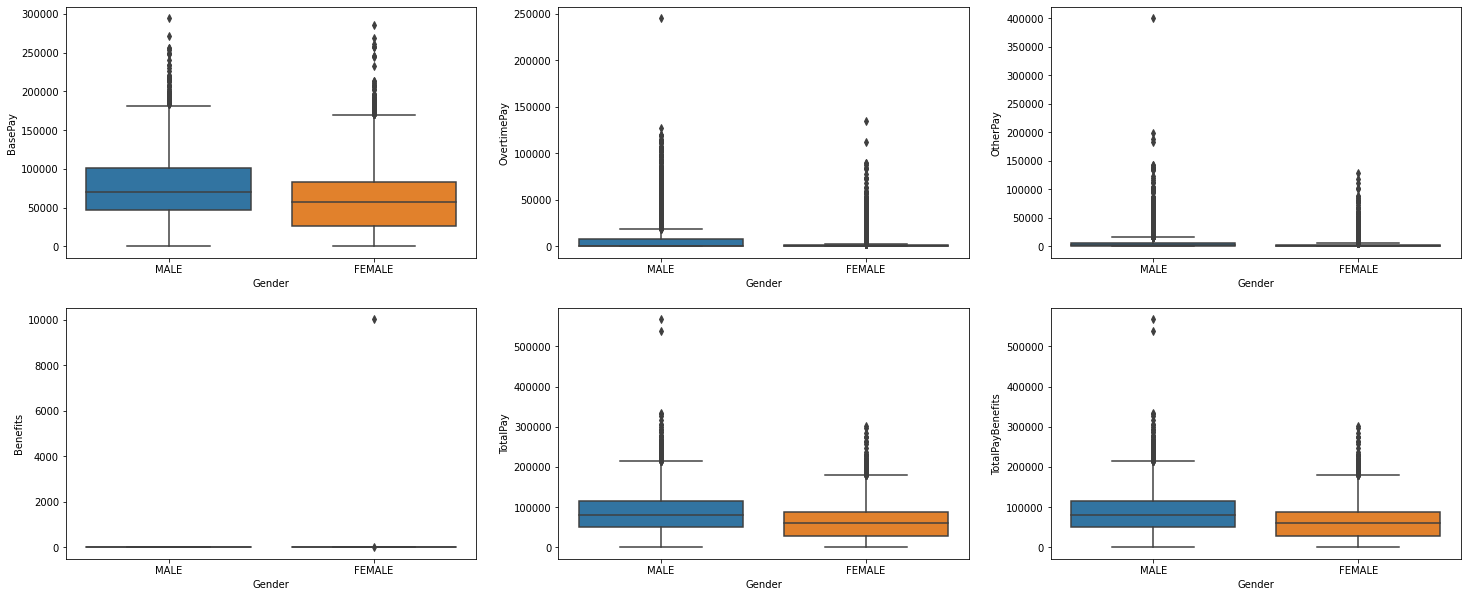

In [355]:
# Boxplot of numerical values  vs Gender 
column_list = df_gender[num_features]
n=1 
_ = plt.figure(figsize=(25,60))
for col in column_list:
  var = 'Gender' 
  data = pd.concat([column_list[col], df_gender[var]], axis=1)
  _ = plt.subplot(11,3,n)
  _ = sns.boxplot(x=var, y =column_list[col], data=data )
  #_ = plt.title(col)
  n = n+1

In [283]:
df_gender['JobTitle'].str.upper()

0        GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
1                       CAPTAIN III (POLICE DEPARTMENT)
2                       CAPTAIN III (POLICE DEPARTMENT)
3                  WIRE ROPE CABLE MAINTENANCE MECHANIC
4          DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)
                              ...                      
36154                SWIMMING INSTRUCTOR/POOL LIFEGUARD
36156        STATIONARY ENGINEER, WATER TREATMENT PLANT
36158                                        MANAGER IV
65892                               LEGAL PROCESS CLERK
72482                            PUBLIC SERVICE TRAINEE
Name: JobTitle, Length: 28666, dtype: object

In [284]:
#df_gender[df_gender['JobTitle'].str.contains('CAPTAIN')]

In [343]:
# Define JobTitle  - High Level vs Gender
# 问题： 为什么不能用 or ?
def JobTitleLevel(title):
    #or 'MANAGER' or 'DIRECTOR' or 'SUPERVISOR' or 'EXECUTIVE' or 'HEAD' or 'CHIEF'
    if 'CAPTAIN'in title :
        return 'HIGH'
    elif 'MANAGER'in title :
        return 'HIGH'
    elif 'DIRECTOR'in title:
        return 'HIGH'
    elif 'SUPERVISOR'in title:
        return 'HIGH'
    elif 'EXECUTIVE'in title:
        return 'HIGH'
    elif 'HEAD'in title:
        return 'HIGH'
    elif 'CHIEF'in title:
        return 'HIGH'
    else:
        return 'OTHER'

In [344]:
# apply function
df_gender['JobLevel'] = df_gender['JobTitle'].apply(lambda x:JobTitleLevel(x))

In [345]:
df_gender['JobLevel'].value_counts()

OTHER    26196
HIGH      2470
Name: JobLevel, dtype: int64

In [307]:
# only with high level marked
#df_joblever = df_gender[df_gender['JobLevel'] == 'HIGH']

- <b>性别与其他变量之间的关系</b>

<ul>
<li>基本工资BasePay,高级职位男女工资差别不大，但是其他职位，男性平均基本工资明显高于女性</li>
</ul>

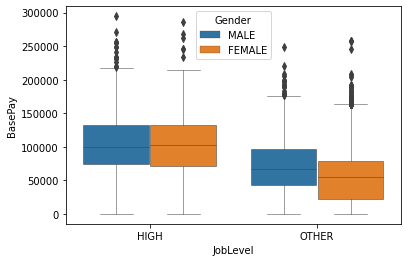

In [362]:
# BasePay
_ = plt.figure(figsize=(6,4))
ax = sns.boxplot(x='JobLevel', y='BasePay', hue='Gender',
                 data=df_gender, linewidth=0.5)